#  Calcular as tendências anuais (ex: indicador PRCPTOT)

###  Calcular as tendências anuais da chuva acumulada para o período 1991-2021 do ERA5 (ex: indicador PRCPTOT)

###  Importar as bibliotecas

In [2]:
!pip install pymannkendall

  Obtaining dependency information for pymannkendall from https://files.pythonhosted.org/packages/ee/95/ba23af664f573022daea4bf25c3b69794a77c966ce6c0e3ce13f12117f4f/pymannkendall-1.4.3-py3-none-any.whl.metadata


In [3]:
import xarray as xr
import numpy as np
import geopandas as gpd
import regionmask as rmk
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pymannkendall as mk

In [4]:
path_ERA5 = 'Dados_ERA5/ERA5_Prec_Month_BR_1991-2023.nc'
path_st = 'Serie_Temporal/'
path_shape_BR_regs = 'BR_Regioes/regioes.shp'
path_shape_BR = 'Brasil_Contorno/Brasil.shp'
path_out = 'Figuras/'

### Carregar o dataset

In [5]:
df_ERA5 = xr.load_dataset(path_ERA5) 

### Selecionar o período da tendência e domínio espacial

In [6]:
df_BR = df_ERA5.sel(time = slice('1991', '2021')).sel(latitude = slice(6, -36), longitude = slice(-77, -33))

### Selecionar a variável chuva do dataset e calcular a chuva total de cada ano para o período 1991-2021

In [7]:
# mm/mês
df_BR = df_BR * 1000 * df_BR.time.dt.daysinmonth 

In [8]:
prec_BR = df_BR['tp']

In [9]:
prec_BR = prec_BR.resample(time = 'Y').sum() 

### Mascarar a região desejada


In [10]:
BR_shp = gpd.read_file(path_shape_BR)

In [11]:
mask_BR = rmk.from_geopandas(BR_shp)

In [12]:
prec_BR = prec_BR.rename({'latitude': 'lat', 'longitude': 'lon'})

In [14]:
prec_mask = mask_BR.mask(prec_BR)

In [15]:
prec_mask_BR = prec_BR.where(prec_mask == 0)

### Calcular as tendências (magnitude e significância estatística)


In [16]:
prec_nc_shape = np.mean(prec_mask_BR, axis = 0) #cria uma variável com valores NAN com a quantidade de elementos necessários do dataarray original

mag_trend = np.empty(prec_nc_shape.shape) #cria a variável magnitude com a quantidade de elementos necessários
sig_trend = np.empty(prec_nc_shape.shape) #cria a variável significância com a quantidade de elementos necessários


for i in range(len(prec_mask_BR.lat.values)): #looping nos pontos de latitude
    
    for j in range(len(prec_mask_BR.lon.values)): #looping nos pontos de longitude
        
        print(f'Calculating Trend for i = {i} and j = {j}')
        
        try:
            mag_trend[i, j] = mk.original_test(prec_mask_BR[:, i, j]).slope #cálculo da magnitude da tendência
            sig_trend[i, j] = mk.original_test(prec_mask_BR[:, i, j]).p #cálculo da significância estatística da tendência
            
        except:
            mag_trend[i, j] = np.nan
            sig_trend[i, j] = np.nan
            
        if sig_trend[i, j] <= 0.05: #valores menores ou iguais a 0.05 de significância são consideradores estatisticamente significativos
            
            sig_trend[i, j] = 1
        
        else:
            sig_trend[i, j] = np.nan

Calculating Trend for i = 0 and j = 0
Calculating Trend for i = 0 and j = 1
Calculating Trend for i = 0 and j = 2
Calculating Trend for i = 0 and j = 3
Calculating Trend for i = 0 and j = 4
Calculating Trend for i = 0 and j = 5
Calculating Trend for i = 0 and j = 6
Calculating Trend for i = 0 and j = 7
Calculating Trend for i = 0 and j = 8
Calculating Trend for i = 0 and j = 9
Calculating Trend for i = 0 and j = 10
Calculating Trend for i = 0 and j = 11
Calculating Trend for i = 0 and j = 12
Calculating Trend for i = 0 and j = 13
Calculating Trend for i = 0 and j = 14
Calculating Trend for i = 0 and j = 15
Calculating Trend for i = 0 and j = 16
Calculating Trend for i = 0 and j = 17
Calculating Trend for i = 0 and j = 18
Calculating Trend for i = 0 and j = 19
Calculating Trend for i = 0 and j = 20
Calculating Trend for i = 0 and j = 21
Calculating Trend for i = 0 and j = 22
Calculating Trend for i = 0 and j = 23
Calculating Trend for i = 0 and j = 24
Calculating Trend for i = 0 and j =

Calculating Trend for i = 4 and j = 59
Calculating Trend for i = 4 and j = 60
Calculating Trend for i = 4 and j = 61
Calculating Trend for i = 4 and j = 62
Calculating Trend for i = 4 and j = 63
Calculating Trend for i = 4 and j = 64
Calculating Trend for i = 4 and j = 65
Calculating Trend for i = 4 and j = 66
Calculating Trend for i = 4 and j = 67
Calculating Trend for i = 4 and j = 68
Calculating Trend for i = 4 and j = 69
Calculating Trend for i = 4 and j = 70
Calculating Trend for i = 4 and j = 71
Calculating Trend for i = 4 and j = 72
Calculating Trend for i = 4 and j = 73
Calculating Trend for i = 4 and j = 74
Calculating Trend for i = 4 and j = 75
Calculating Trend for i = 4 and j = 76
Calculating Trend for i = 4 and j = 77
Calculating Trend for i = 4 and j = 78
Calculating Trend for i = 4 and j = 79
Calculating Trend for i = 4 and j = 80
Calculating Trend for i = 4 and j = 81
Calculating Trend for i = 4 and j = 82
Calculating Trend for i = 4 and j = 83
Calculating Trend for i =

Calculating Trend for i = 8 and j = 22
Calculating Trend for i = 8 and j = 23
Calculating Trend for i = 8 and j = 24
Calculating Trend for i = 8 and j = 25
Calculating Trend for i = 8 and j = 26
Calculating Trend for i = 8 and j = 27
Calculating Trend for i = 8 and j = 28
Calculating Trend for i = 8 and j = 29
Calculating Trend for i = 8 and j = 30
Calculating Trend for i = 8 and j = 31
Calculating Trend for i = 8 and j = 32
Calculating Trend for i = 8 and j = 33
Calculating Trend for i = 8 and j = 34
Calculating Trend for i = 8 and j = 35
Calculating Trend for i = 8 and j = 36
Calculating Trend for i = 8 and j = 37
Calculating Trend for i = 8 and j = 38
Calculating Trend for i = 8 and j = 39
Calculating Trend for i = 8 and j = 40
Calculating Trend for i = 8 and j = 41
Calculating Trend for i = 8 and j = 42
Calculating Trend for i = 8 and j = 43
Calculating Trend for i = 8 and j = 44
Calculating Trend for i = 8 and j = 45
Calculating Trend for i = 8 and j = 46
Calculating Trend for i =

Calculating Trend for i = 10 and j = 57
Calculating Trend for i = 10 and j = 58
Calculating Trend for i = 10 and j = 59
Calculating Trend for i = 10 and j = 60
Calculating Trend for i = 10 and j = 61
Calculating Trend for i = 10 and j = 62
Calculating Trend for i = 10 and j = 63
Calculating Trend for i = 10 and j = 64
Calculating Trend for i = 10 and j = 65
Calculating Trend for i = 10 and j = 66
Calculating Trend for i = 10 and j = 67
Calculating Trend for i = 10 and j = 68
Calculating Trend for i = 10 and j = 69
Calculating Trend for i = 10 and j = 70
Calculating Trend for i = 10 and j = 71
Calculating Trend for i = 10 and j = 72
Calculating Trend for i = 10 and j = 73
Calculating Trend for i = 10 and j = 74
Calculating Trend for i = 10 and j = 75
Calculating Trend for i = 10 and j = 76
Calculating Trend for i = 10 and j = 77
Calculating Trend for i = 10 and j = 78
Calculating Trend for i = 10 and j = 79
Calculating Trend for i = 10 and j = 80
Calculating Trend for i = 10 and j = 81


Calculating Trend for i = 12 and j = 60
Calculating Trend for i = 12 and j = 61
Calculating Trend for i = 12 and j = 62
Calculating Trend for i = 12 and j = 63
Calculating Trend for i = 12 and j = 64
Calculating Trend for i = 12 and j = 65
Calculating Trend for i = 12 and j = 66
Calculating Trend for i = 12 and j = 67
Calculating Trend for i = 12 and j = 68
Calculating Trend for i = 12 and j = 69
Calculating Trend for i = 12 and j = 70
Calculating Trend for i = 12 and j = 71
Calculating Trend for i = 12 and j = 72
Calculating Trend for i = 12 and j = 73
Calculating Trend for i = 12 and j = 74
Calculating Trend for i = 12 and j = 75
Calculating Trend for i = 12 and j = 76
Calculating Trend for i = 12 and j = 77
Calculating Trend for i = 12 and j = 78
Calculating Trend for i = 12 and j = 79
Calculating Trend for i = 12 and j = 80
Calculating Trend for i = 12 and j = 81
Calculating Trend for i = 12 and j = 82
Calculating Trend for i = 12 and j = 83
Calculating Trend for i = 12 and j = 84


Calculating Trend for i = 14 and j = 57
Calculating Trend for i = 14 and j = 58
Calculating Trend for i = 14 and j = 59
Calculating Trend for i = 14 and j = 60
Calculating Trend for i = 14 and j = 61
Calculating Trend for i = 14 and j = 62
Calculating Trend for i = 14 and j = 63
Calculating Trend for i = 14 and j = 64
Calculating Trend for i = 14 and j = 65
Calculating Trend for i = 14 and j = 66
Calculating Trend for i = 14 and j = 67
Calculating Trend for i = 14 and j = 68
Calculating Trend for i = 14 and j = 69
Calculating Trend for i = 14 and j = 70
Calculating Trend for i = 14 and j = 71
Calculating Trend for i = 14 and j = 72
Calculating Trend for i = 14 and j = 73
Calculating Trend for i = 14 and j = 74
Calculating Trend for i = 14 and j = 75
Calculating Trend for i = 14 and j = 76
Calculating Trend for i = 14 and j = 77
Calculating Trend for i = 14 and j = 78
Calculating Trend for i = 14 and j = 79
Calculating Trend for i = 14 and j = 80
Calculating Trend for i = 14 and j = 81


Calculating Trend for i = 17 and j = 29
Calculating Trend for i = 17 and j = 30
Calculating Trend for i = 17 and j = 31
Calculating Trend for i = 17 and j = 32
Calculating Trend for i = 17 and j = 33
Calculating Trend for i = 17 and j = 34
Calculating Trend for i = 17 and j = 35
Calculating Trend for i = 17 and j = 36
Calculating Trend for i = 17 and j = 37
Calculating Trend for i = 17 and j = 38
Calculating Trend for i = 17 and j = 39
Calculating Trend for i = 17 and j = 40
Calculating Trend for i = 17 and j = 41
Calculating Trend for i = 17 and j = 42
Calculating Trend for i = 17 and j = 43
Calculating Trend for i = 17 and j = 44
Calculating Trend for i = 17 and j = 45
Calculating Trend for i = 17 and j = 46
Calculating Trend for i = 17 and j = 47
Calculating Trend for i = 17 and j = 48
Calculating Trend for i = 17 and j = 49
Calculating Trend for i = 17 and j = 50
Calculating Trend for i = 17 and j = 51
Calculating Trend for i = 17 and j = 52
Calculating Trend for i = 17 and j = 53


Calculating Trend for i = 19 and j = 48
Calculating Trend for i = 19 and j = 49
Calculating Trend for i = 19 and j = 50
Calculating Trend for i = 19 and j = 51
Calculating Trend for i = 19 and j = 52
Calculating Trend for i = 19 and j = 53
Calculating Trend for i = 19 and j = 54
Calculating Trend for i = 19 and j = 55
Calculating Trend for i = 19 and j = 56
Calculating Trend for i = 19 and j = 57
Calculating Trend for i = 19 and j = 58
Calculating Trend for i = 19 and j = 59
Calculating Trend for i = 19 and j = 60
Calculating Trend for i = 19 and j = 61
Calculating Trend for i = 19 and j = 62
Calculating Trend for i = 19 and j = 63
Calculating Trend for i = 19 and j = 64
Calculating Trend for i = 19 and j = 65
Calculating Trend for i = 19 and j = 66
Calculating Trend for i = 19 and j = 67
Calculating Trend for i = 19 and j = 68
Calculating Trend for i = 19 and j = 69
Calculating Trend for i = 19 and j = 70
Calculating Trend for i = 19 and j = 71
Calculating Trend for i = 19 and j = 72


Calculating Trend for i = 21 and j = 38
Calculating Trend for i = 21 and j = 39
Calculating Trend for i = 21 and j = 40
Calculating Trend for i = 21 and j = 41
Calculating Trend for i = 21 and j = 42
Calculating Trend for i = 21 and j = 43
Calculating Trend for i = 21 and j = 44
Calculating Trend for i = 21 and j = 45
Calculating Trend for i = 21 and j = 46
Calculating Trend for i = 21 and j = 47
Calculating Trend for i = 21 and j = 48
Calculating Trend for i = 21 and j = 49
Calculating Trend for i = 21 and j = 50
Calculating Trend for i = 21 and j = 51
Calculating Trend for i = 21 and j = 52
Calculating Trend for i = 21 and j = 53
Calculating Trend for i = 21 and j = 54
Calculating Trend for i = 21 and j = 55
Calculating Trend for i = 21 and j = 56
Calculating Trend for i = 21 and j = 57
Calculating Trend for i = 21 and j = 58
Calculating Trend for i = 21 and j = 59
Calculating Trend for i = 21 and j = 60
Calculating Trend for i = 21 and j = 61
Calculating Trend for i = 21 and j = 62


Calculating Trend for i = 22 and j = 92
Calculating Trend for i = 22 and j = 93
Calculating Trend for i = 22 and j = 94
Calculating Trend for i = 22 and j = 95
Calculating Trend for i = 22 and j = 96
Calculating Trend for i = 22 and j = 97
Calculating Trend for i = 22 and j = 98
Calculating Trend for i = 22 and j = 99
Calculating Trend for i = 22 and j = 100
Calculating Trend for i = 22 and j = 101
Calculating Trend for i = 22 and j = 102
Calculating Trend for i = 22 and j = 103
Calculating Trend for i = 22 and j = 104
Calculating Trend for i = 22 and j = 105
Calculating Trend for i = 22 and j = 106
Calculating Trend for i = 22 and j = 107
Calculating Trend for i = 22 and j = 108
Calculating Trend for i = 22 and j = 109
Calculating Trend for i = 22 and j = 110
Calculating Trend for i = 22 and j = 111
Calculating Trend for i = 22 and j = 112
Calculating Trend for i = 22 and j = 113
Calculating Trend for i = 22 and j = 114
Calculating Trend for i = 22 and j = 115
Calculating Trend for i 

Calculating Trend for i = 24 and j = 72
Calculating Trend for i = 24 and j = 73
Calculating Trend for i = 24 and j = 74
Calculating Trend for i = 24 and j = 75
Calculating Trend for i = 24 and j = 76
Calculating Trend for i = 24 and j = 77
Calculating Trend for i = 24 and j = 78
Calculating Trend for i = 24 and j = 79
Calculating Trend for i = 24 and j = 80
Calculating Trend for i = 24 and j = 81
Calculating Trend for i = 24 and j = 82
Calculating Trend for i = 24 and j = 83
Calculating Trend for i = 24 and j = 84
Calculating Trend for i = 24 and j = 85
Calculating Trend for i = 24 and j = 86
Calculating Trend for i = 24 and j = 87
Calculating Trend for i = 24 and j = 88
Calculating Trend for i = 24 and j = 89
Calculating Trend for i = 24 and j = 90
Calculating Trend for i = 24 and j = 91
Calculating Trend for i = 24 and j = 92
Calculating Trend for i = 24 and j = 93
Calculating Trend for i = 24 and j = 94
Calculating Trend for i = 24 and j = 95
Calculating Trend for i = 24 and j = 96


Calculating Trend for i = 26 and j = 58
Calculating Trend for i = 26 and j = 59
Calculating Trend for i = 26 and j = 60
Calculating Trend for i = 26 and j = 61
Calculating Trend for i = 26 and j = 62
Calculating Trend for i = 26 and j = 63
Calculating Trend for i = 26 and j = 64
Calculating Trend for i = 26 and j = 65
Calculating Trend for i = 26 and j = 66
Calculating Trend for i = 26 and j = 67
Calculating Trend for i = 26 and j = 68
Calculating Trend for i = 26 and j = 69
Calculating Trend for i = 26 and j = 70
Calculating Trend for i = 26 and j = 71
Calculating Trend for i = 26 and j = 72
Calculating Trend for i = 26 and j = 73
Calculating Trend for i = 26 and j = 74
Calculating Trend for i = 26 and j = 75
Calculating Trend for i = 26 and j = 76
Calculating Trend for i = 26 and j = 77
Calculating Trend for i = 26 and j = 78
Calculating Trend for i = 26 and j = 79
Calculating Trend for i = 26 and j = 80
Calculating Trend for i = 26 and j = 81
Calculating Trend for i = 26 and j = 82


Calculating Trend for i = 27 and j = 105
Calculating Trend for i = 27 and j = 106
Calculating Trend for i = 27 and j = 107
Calculating Trend for i = 27 and j = 108
Calculating Trend for i = 27 and j = 109
Calculating Trend for i = 27 and j = 110
Calculating Trend for i = 27 and j = 111
Calculating Trend for i = 27 and j = 112
Calculating Trend for i = 27 and j = 113
Calculating Trend for i = 27 and j = 114
Calculating Trend for i = 27 and j = 115
Calculating Trend for i = 27 and j = 116
Calculating Trend for i = 27 and j = 117
Calculating Trend for i = 27 and j = 118
Calculating Trend for i = 27 and j = 119
Calculating Trend for i = 27 and j = 120
Calculating Trend for i = 27 and j = 121
Calculating Trend for i = 27 and j = 122
Calculating Trend for i = 27 and j = 123
Calculating Trend for i = 27 and j = 124
Calculating Trend for i = 27 and j = 125
Calculating Trend for i = 27 and j = 126
Calculating Trend for i = 27 and j = 127
Calculating Trend for i = 27 and j = 128
Calculating Tren

Calculating Trend for i = 29 and j = 58
Calculating Trend for i = 29 and j = 59
Calculating Trend for i = 29 and j = 60
Calculating Trend for i = 29 and j = 61
Calculating Trend for i = 29 and j = 62
Calculating Trend for i = 29 and j = 63
Calculating Trend for i = 29 and j = 64
Calculating Trend for i = 29 and j = 65
Calculating Trend for i = 29 and j = 66
Calculating Trend for i = 29 and j = 67
Calculating Trend for i = 29 and j = 68
Calculating Trend for i = 29 and j = 69
Calculating Trend for i = 29 and j = 70
Calculating Trend for i = 29 and j = 71
Calculating Trend for i = 29 and j = 72
Calculating Trend for i = 29 and j = 73
Calculating Trend for i = 29 and j = 74
Calculating Trend for i = 29 and j = 75
Calculating Trend for i = 29 and j = 76
Calculating Trend for i = 29 and j = 77
Calculating Trend for i = 29 and j = 78
Calculating Trend for i = 29 and j = 79
Calculating Trend for i = 29 and j = 80
Calculating Trend for i = 29 and j = 81
Calculating Trend for i = 29 and j = 82


Calculating Trend for i = 30 and j = 109
Calculating Trend for i = 30 and j = 110
Calculating Trend for i = 30 and j = 111
Calculating Trend for i = 30 and j = 112
Calculating Trend for i = 30 and j = 113
Calculating Trend for i = 30 and j = 114
Calculating Trend for i = 30 and j = 115
Calculating Trend for i = 30 and j = 116
Calculating Trend for i = 30 and j = 117
Calculating Trend for i = 30 and j = 118
Calculating Trend for i = 30 and j = 119
Calculating Trend for i = 30 and j = 120
Calculating Trend for i = 30 and j = 121
Calculating Trend for i = 30 and j = 122
Calculating Trend for i = 30 and j = 123
Calculating Trend for i = 30 and j = 124
Calculating Trend for i = 30 and j = 125
Calculating Trend for i = 30 and j = 126
Calculating Trend for i = 30 and j = 127
Calculating Trend for i = 30 and j = 128
Calculating Trend for i = 30 and j = 129
Calculating Trend for i = 30 and j = 130
Calculating Trend for i = 30 and j = 131
Calculating Trend for i = 30 and j = 132
Calculating Tren

Calculating Trend for i = 32 and j = 57
Calculating Trend for i = 32 and j = 58
Calculating Trend for i = 32 and j = 59
Calculating Trend for i = 32 and j = 60
Calculating Trend for i = 32 and j = 61
Calculating Trend for i = 32 and j = 62
Calculating Trend for i = 32 and j = 63
Calculating Trend for i = 32 and j = 64
Calculating Trend for i = 32 and j = 65
Calculating Trend for i = 32 and j = 66
Calculating Trend for i = 32 and j = 67
Calculating Trend for i = 32 and j = 68
Calculating Trend for i = 32 and j = 69
Calculating Trend for i = 32 and j = 70
Calculating Trend for i = 32 and j = 71
Calculating Trend for i = 32 and j = 72
Calculating Trend for i = 32 and j = 73
Calculating Trend for i = 32 and j = 74
Calculating Trend for i = 32 and j = 75
Calculating Trend for i = 32 and j = 76
Calculating Trend for i = 32 and j = 77
Calculating Trend for i = 32 and j = 78
Calculating Trend for i = 32 and j = 79
Calculating Trend for i = 32 and j = 80
Calculating Trend for i = 32 and j = 81


Calculating Trend for i = 33 and j = 106
Calculating Trend for i = 33 and j = 107
Calculating Trend for i = 33 and j = 108
Calculating Trend for i = 33 and j = 109
Calculating Trend for i = 33 and j = 110
Calculating Trend for i = 33 and j = 111
Calculating Trend for i = 33 and j = 112
Calculating Trend for i = 33 and j = 113
Calculating Trend for i = 33 and j = 114
Calculating Trend for i = 33 and j = 115
Calculating Trend for i = 33 and j = 116
Calculating Trend for i = 33 and j = 117
Calculating Trend for i = 33 and j = 118
Calculating Trend for i = 33 and j = 119
Calculating Trend for i = 33 and j = 120
Calculating Trend for i = 33 and j = 121
Calculating Trend for i = 33 and j = 122
Calculating Trend for i = 33 and j = 123
Calculating Trend for i = 33 and j = 124
Calculating Trend for i = 33 and j = 125
Calculating Trend for i = 33 and j = 126
Calculating Trend for i = 33 and j = 127
Calculating Trend for i = 33 and j = 128
Calculating Trend for i = 33 and j = 129
Calculating Tren

Calculating Trend for i = 35 and j = 64
Calculating Trend for i = 35 and j = 65
Calculating Trend for i = 35 and j = 66
Calculating Trend for i = 35 and j = 67
Calculating Trend for i = 35 and j = 68
Calculating Trend for i = 35 and j = 69
Calculating Trend for i = 35 and j = 70
Calculating Trend for i = 35 and j = 71
Calculating Trend for i = 35 and j = 72
Calculating Trend for i = 35 and j = 73
Calculating Trend for i = 35 and j = 74
Calculating Trend for i = 35 and j = 75
Calculating Trend for i = 35 and j = 76
Calculating Trend for i = 35 and j = 77
Calculating Trend for i = 35 and j = 78
Calculating Trend for i = 35 and j = 79
Calculating Trend for i = 35 and j = 80
Calculating Trend for i = 35 and j = 81
Calculating Trend for i = 35 and j = 82
Calculating Trend for i = 35 and j = 83
Calculating Trend for i = 35 and j = 84
Calculating Trend for i = 35 and j = 85
Calculating Trend for i = 35 and j = 86
Calculating Trend for i = 35 and j = 87
Calculating Trend for i = 35 and j = 88


Calculating Trend for i = 37 and j = 25
Calculating Trend for i = 37 and j = 26
Calculating Trend for i = 37 and j = 27
Calculating Trend for i = 37 and j = 28
Calculating Trend for i = 37 and j = 29
Calculating Trend for i = 37 and j = 30
Calculating Trend for i = 37 and j = 31
Calculating Trend for i = 37 and j = 32
Calculating Trend for i = 37 and j = 33
Calculating Trend for i = 37 and j = 34
Calculating Trend for i = 37 and j = 35
Calculating Trend for i = 37 and j = 36
Calculating Trend for i = 37 and j = 37
Calculating Trend for i = 37 and j = 38
Calculating Trend for i = 37 and j = 39
Calculating Trend for i = 37 and j = 40
Calculating Trend for i = 37 and j = 41
Calculating Trend for i = 37 and j = 42
Calculating Trend for i = 37 and j = 43
Calculating Trend for i = 37 and j = 44
Calculating Trend for i = 37 and j = 45
Calculating Trend for i = 37 and j = 46
Calculating Trend for i = 37 and j = 47
Calculating Trend for i = 37 and j = 48
Calculating Trend for i = 37 and j = 49


Calculating Trend for i = 38 and j = 142
Calculating Trend for i = 38 and j = 143
Calculating Trend for i = 38 and j = 144
Calculating Trend for i = 38 and j = 145
Calculating Trend for i = 38 and j = 146
Calculating Trend for i = 38 and j = 147
Calculating Trend for i = 38 and j = 148
Calculating Trend for i = 38 and j = 149
Calculating Trend for i = 38 and j = 150
Calculating Trend for i = 38 and j = 151
Calculating Trend for i = 38 and j = 152
Calculating Trend for i = 38 and j = 153
Calculating Trend for i = 38 and j = 154
Calculating Trend for i = 38 and j = 155
Calculating Trend for i = 38 and j = 156
Calculating Trend for i = 38 and j = 157
Calculating Trend for i = 38 and j = 158
Calculating Trend for i = 38 and j = 159
Calculating Trend for i = 38 and j = 160
Calculating Trend for i = 38 and j = 161
Calculating Trend for i = 38 and j = 162
Calculating Trend for i = 38 and j = 163
Calculating Trend for i = 38 and j = 164
Calculating Trend for i = 38 and j = 165
Calculating Tren

Calculating Trend for i = 40 and j = 41
Calculating Trend for i = 40 and j = 42
Calculating Trend for i = 40 and j = 43
Calculating Trend for i = 40 and j = 44
Calculating Trend for i = 40 and j = 45
Calculating Trend for i = 40 and j = 46
Calculating Trend for i = 40 and j = 47
Calculating Trend for i = 40 and j = 48
Calculating Trend for i = 40 and j = 49
Calculating Trend for i = 40 and j = 50
Calculating Trend for i = 40 and j = 51
Calculating Trend for i = 40 and j = 52
Calculating Trend for i = 40 and j = 53
Calculating Trend for i = 40 and j = 54
Calculating Trend for i = 40 and j = 55
Calculating Trend for i = 40 and j = 56
Calculating Trend for i = 40 and j = 57
Calculating Trend for i = 40 and j = 58
Calculating Trend for i = 40 and j = 59
Calculating Trend for i = 40 and j = 60
Calculating Trend for i = 40 and j = 61
Calculating Trend for i = 40 and j = 62
Calculating Trend for i = 40 and j = 63
Calculating Trend for i = 40 and j = 64
Calculating Trend for i = 40 and j = 65


Calculating Trend for i = 41 and j = 141
Calculating Trend for i = 41 and j = 142
Calculating Trend for i = 41 and j = 143
Calculating Trend for i = 41 and j = 144
Calculating Trend for i = 41 and j = 145
Calculating Trend for i = 41 and j = 146
Calculating Trend for i = 41 and j = 147
Calculating Trend for i = 41 and j = 148
Calculating Trend for i = 41 and j = 149
Calculating Trend for i = 41 and j = 150
Calculating Trend for i = 41 and j = 151
Calculating Trend for i = 41 and j = 152
Calculating Trend for i = 41 and j = 153
Calculating Trend for i = 41 and j = 154
Calculating Trend for i = 41 and j = 155
Calculating Trend for i = 41 and j = 156
Calculating Trend for i = 41 and j = 157
Calculating Trend for i = 41 and j = 158
Calculating Trend for i = 41 and j = 159
Calculating Trend for i = 41 and j = 160
Calculating Trend for i = 41 and j = 161
Calculating Trend for i = 41 and j = 162
Calculating Trend for i = 41 and j = 163
Calculating Trend for i = 41 and j = 164
Calculating Tren

Calculating Trend for i = 43 and j = 23
Calculating Trend for i = 43 and j = 24
Calculating Trend for i = 43 and j = 25
Calculating Trend for i = 43 and j = 26
Calculating Trend for i = 43 and j = 27
Calculating Trend for i = 43 and j = 28
Calculating Trend for i = 43 and j = 29
Calculating Trend for i = 43 and j = 30
Calculating Trend for i = 43 and j = 31
Calculating Trend for i = 43 and j = 32
Calculating Trend for i = 43 and j = 33
Calculating Trend for i = 43 and j = 34
Calculating Trend for i = 43 and j = 35
Calculating Trend for i = 43 and j = 36
Calculating Trend for i = 43 and j = 37
Calculating Trend for i = 43 and j = 38
Calculating Trend for i = 43 and j = 39
Calculating Trend for i = 43 and j = 40
Calculating Trend for i = 43 and j = 41
Calculating Trend for i = 43 and j = 42
Calculating Trend for i = 43 and j = 43
Calculating Trend for i = 43 and j = 44
Calculating Trend for i = 43 and j = 45
Calculating Trend for i = 43 and j = 46
Calculating Trend for i = 43 and j = 47


Calculating Trend for i = 44 and j = 97
Calculating Trend for i = 44 and j = 98
Calculating Trend for i = 44 and j = 99
Calculating Trend for i = 44 and j = 100
Calculating Trend for i = 44 and j = 101
Calculating Trend for i = 44 and j = 102
Calculating Trend for i = 44 and j = 103
Calculating Trend for i = 44 and j = 104
Calculating Trend for i = 44 and j = 105
Calculating Trend for i = 44 and j = 106
Calculating Trend for i = 44 and j = 107
Calculating Trend for i = 44 and j = 108
Calculating Trend for i = 44 and j = 109
Calculating Trend for i = 44 and j = 110
Calculating Trend for i = 44 and j = 111
Calculating Trend for i = 44 and j = 112
Calculating Trend for i = 44 and j = 113
Calculating Trend for i = 44 and j = 114
Calculating Trend for i = 44 and j = 115
Calculating Trend for i = 44 and j = 116
Calculating Trend for i = 44 and j = 117
Calculating Trend for i = 44 and j = 118
Calculating Trend for i = 44 and j = 119
Calculating Trend for i = 44 and j = 120
Calculating Trend f

Calculating Trend for i = 46 and j = 15
Calculating Trend for i = 46 and j = 16
Calculating Trend for i = 46 and j = 17
Calculating Trend for i = 46 and j = 18
Calculating Trend for i = 46 and j = 19
Calculating Trend for i = 46 and j = 20
Calculating Trend for i = 46 and j = 21
Calculating Trend for i = 46 and j = 22
Calculating Trend for i = 46 and j = 23
Calculating Trend for i = 46 and j = 24
Calculating Trend for i = 46 and j = 25
Calculating Trend for i = 46 and j = 26
Calculating Trend for i = 46 and j = 27
Calculating Trend for i = 46 and j = 28
Calculating Trend for i = 46 and j = 29
Calculating Trend for i = 46 and j = 30
Calculating Trend for i = 46 and j = 31
Calculating Trend for i = 46 and j = 32
Calculating Trend for i = 46 and j = 33
Calculating Trend for i = 46 and j = 34
Calculating Trend for i = 46 and j = 35
Calculating Trend for i = 46 and j = 36
Calculating Trend for i = 46 and j = 37
Calculating Trend for i = 46 and j = 38
Calculating Trend for i = 46 and j = 39


Calculating Trend for i = 47 and j = 95
Calculating Trend for i = 47 and j = 96
Calculating Trend for i = 47 and j = 97
Calculating Trend for i = 47 and j = 98
Calculating Trend for i = 47 and j = 99
Calculating Trend for i = 47 and j = 100
Calculating Trend for i = 47 and j = 101
Calculating Trend for i = 47 and j = 102
Calculating Trend for i = 47 and j = 103
Calculating Trend for i = 47 and j = 104
Calculating Trend for i = 47 and j = 105
Calculating Trend for i = 47 and j = 106
Calculating Trend for i = 47 and j = 107
Calculating Trend for i = 47 and j = 108
Calculating Trend for i = 47 and j = 109
Calculating Trend for i = 47 and j = 110
Calculating Trend for i = 47 and j = 111
Calculating Trend for i = 47 and j = 112
Calculating Trend for i = 47 and j = 113
Calculating Trend for i = 47 and j = 114
Calculating Trend for i = 47 and j = 115
Calculating Trend for i = 47 and j = 116
Calculating Trend for i = 47 and j = 117
Calculating Trend for i = 47 and j = 118
Calculating Trend for

Calculating Trend for i = 49 and j = 20
Calculating Trend for i = 49 and j = 21
Calculating Trend for i = 49 and j = 22
Calculating Trend for i = 49 and j = 23
Calculating Trend for i = 49 and j = 24
Calculating Trend for i = 49 and j = 25
Calculating Trend for i = 49 and j = 26
Calculating Trend for i = 49 and j = 27
Calculating Trend for i = 49 and j = 28
Calculating Trend for i = 49 and j = 29
Calculating Trend for i = 49 and j = 30
Calculating Trend for i = 49 and j = 31
Calculating Trend for i = 49 and j = 32
Calculating Trend for i = 49 and j = 33
Calculating Trend for i = 49 and j = 34
Calculating Trend for i = 49 and j = 35
Calculating Trend for i = 49 and j = 36
Calculating Trend for i = 49 and j = 37
Calculating Trend for i = 49 and j = 38
Calculating Trend for i = 49 and j = 39
Calculating Trend for i = 49 and j = 40
Calculating Trend for i = 49 and j = 41
Calculating Trend for i = 49 and j = 42
Calculating Trend for i = 49 and j = 43
Calculating Trend for i = 49 and j = 44


Calculating Trend for i = 50 and j = 97
Calculating Trend for i = 50 and j = 98
Calculating Trend for i = 50 and j = 99
Calculating Trend for i = 50 and j = 100
Calculating Trend for i = 50 and j = 101
Calculating Trend for i = 50 and j = 102
Calculating Trend for i = 50 and j = 103
Calculating Trend for i = 50 and j = 104
Calculating Trend for i = 50 and j = 105
Calculating Trend for i = 50 and j = 106
Calculating Trend for i = 50 and j = 107
Calculating Trend for i = 50 and j = 108
Calculating Trend for i = 50 and j = 109
Calculating Trend for i = 50 and j = 110
Calculating Trend for i = 50 and j = 111
Calculating Trend for i = 50 and j = 112
Calculating Trend for i = 50 and j = 113
Calculating Trend for i = 50 and j = 114
Calculating Trend for i = 50 and j = 115
Calculating Trend for i = 50 and j = 116
Calculating Trend for i = 50 and j = 117
Calculating Trend for i = 50 and j = 118
Calculating Trend for i = 50 and j = 119
Calculating Trend for i = 50 and j = 120
Calculating Trend f

Calculating Trend for i = 52 and j = 17
Calculating Trend for i = 52 and j = 18
Calculating Trend for i = 52 and j = 19
Calculating Trend for i = 52 and j = 20
Calculating Trend for i = 52 and j = 21
Calculating Trend for i = 52 and j = 22
Calculating Trend for i = 52 and j = 23
Calculating Trend for i = 52 and j = 24
Calculating Trend for i = 52 and j = 25
Calculating Trend for i = 52 and j = 26
Calculating Trend for i = 52 and j = 27
Calculating Trend for i = 52 and j = 28
Calculating Trend for i = 52 and j = 29
Calculating Trend for i = 52 and j = 30
Calculating Trend for i = 52 and j = 31
Calculating Trend for i = 52 and j = 32
Calculating Trend for i = 52 and j = 33
Calculating Trend for i = 52 and j = 34
Calculating Trend for i = 52 and j = 35
Calculating Trend for i = 52 and j = 36
Calculating Trend for i = 52 and j = 37
Calculating Trend for i = 52 and j = 38
Calculating Trend for i = 52 and j = 39
Calculating Trend for i = 52 and j = 40
Calculating Trend for i = 52 and j = 41


Calculating Trend for i = 53 and j = 104
Calculating Trend for i = 53 and j = 105
Calculating Trend for i = 53 and j = 106
Calculating Trend for i = 53 and j = 107
Calculating Trend for i = 53 and j = 108
Calculating Trend for i = 53 and j = 109
Calculating Trend for i = 53 and j = 110
Calculating Trend for i = 53 and j = 111
Calculating Trend for i = 53 and j = 112
Calculating Trend for i = 53 and j = 113
Calculating Trend for i = 53 and j = 114
Calculating Trend for i = 53 and j = 115
Calculating Trend for i = 53 and j = 116
Calculating Trend for i = 53 and j = 117
Calculating Trend for i = 53 and j = 118
Calculating Trend for i = 53 and j = 119
Calculating Trend for i = 53 and j = 120
Calculating Trend for i = 53 and j = 121
Calculating Trend for i = 53 and j = 122
Calculating Trend for i = 53 and j = 123
Calculating Trend for i = 53 and j = 124
Calculating Trend for i = 53 and j = 125
Calculating Trend for i = 53 and j = 126
Calculating Trend for i = 53 and j = 127
Calculating Tren

Calculating Trend for i = 55 and j = 19
Calculating Trend for i = 55 and j = 20
Calculating Trend for i = 55 and j = 21
Calculating Trend for i = 55 and j = 22
Calculating Trend for i = 55 and j = 23
Calculating Trend for i = 55 and j = 24
Calculating Trend for i = 55 and j = 25
Calculating Trend for i = 55 and j = 26
Calculating Trend for i = 55 and j = 27
Calculating Trend for i = 55 and j = 28
Calculating Trend for i = 55 and j = 29
Calculating Trend for i = 55 and j = 30
Calculating Trend for i = 55 and j = 31
Calculating Trend for i = 55 and j = 32
Calculating Trend for i = 55 and j = 33
Calculating Trend for i = 55 and j = 34
Calculating Trend for i = 55 and j = 35
Calculating Trend for i = 55 and j = 36
Calculating Trend for i = 55 and j = 37
Calculating Trend for i = 55 and j = 38
Calculating Trend for i = 55 and j = 39
Calculating Trend for i = 55 and j = 40
Calculating Trend for i = 55 and j = 41
Calculating Trend for i = 55 and j = 42
Calculating Trend for i = 55 and j = 43


Calculating Trend for i = 56 and j = 91
Calculating Trend for i = 56 and j = 92
Calculating Trend for i = 56 and j = 93
Calculating Trend for i = 56 and j = 94
Calculating Trend for i = 56 and j = 95
Calculating Trend for i = 56 and j = 96
Calculating Trend for i = 56 and j = 97
Calculating Trend for i = 56 and j = 98
Calculating Trend for i = 56 and j = 99
Calculating Trend for i = 56 and j = 100
Calculating Trend for i = 56 and j = 101
Calculating Trend for i = 56 and j = 102
Calculating Trend for i = 56 and j = 103
Calculating Trend for i = 56 and j = 104
Calculating Trend for i = 56 and j = 105
Calculating Trend for i = 56 and j = 106
Calculating Trend for i = 56 and j = 107
Calculating Trend for i = 56 and j = 108
Calculating Trend for i = 56 and j = 109
Calculating Trend for i = 56 and j = 110
Calculating Trend for i = 56 and j = 111
Calculating Trend for i = 56 and j = 112
Calculating Trend for i = 56 and j = 113
Calculating Trend for i = 56 and j = 114
Calculating Trend for i =

Calculating Trend for i = 58 and j = 17
Calculating Trend for i = 58 and j = 18
Calculating Trend for i = 58 and j = 19
Calculating Trend for i = 58 and j = 20
Calculating Trend for i = 58 and j = 21
Calculating Trend for i = 58 and j = 22
Calculating Trend for i = 58 and j = 23
Calculating Trend for i = 58 and j = 24
Calculating Trend for i = 58 and j = 25
Calculating Trend for i = 58 and j = 26
Calculating Trend for i = 58 and j = 27
Calculating Trend for i = 58 and j = 28
Calculating Trend for i = 58 and j = 29
Calculating Trend for i = 58 and j = 30
Calculating Trend for i = 58 and j = 31
Calculating Trend for i = 58 and j = 32
Calculating Trend for i = 58 and j = 33
Calculating Trend for i = 58 and j = 34
Calculating Trend for i = 58 and j = 35
Calculating Trend for i = 58 and j = 36
Calculating Trend for i = 58 and j = 37
Calculating Trend for i = 58 and j = 38
Calculating Trend for i = 58 and j = 39
Calculating Trend for i = 58 and j = 40
Calculating Trend for i = 58 and j = 41


Calculating Trend for i = 59 and j = 96
Calculating Trend for i = 59 and j = 97
Calculating Trend for i = 59 and j = 98
Calculating Trend for i = 59 and j = 99
Calculating Trend for i = 59 and j = 100
Calculating Trend for i = 59 and j = 101
Calculating Trend for i = 59 and j = 102
Calculating Trend for i = 59 and j = 103
Calculating Trend for i = 59 and j = 104
Calculating Trend for i = 59 and j = 105
Calculating Trend for i = 59 and j = 106
Calculating Trend for i = 59 and j = 107
Calculating Trend for i = 59 and j = 108
Calculating Trend for i = 59 and j = 109
Calculating Trend for i = 59 and j = 110
Calculating Trend for i = 59 and j = 111
Calculating Trend for i = 59 and j = 112
Calculating Trend for i = 59 and j = 113
Calculating Trend for i = 59 and j = 114
Calculating Trend for i = 59 and j = 115
Calculating Trend for i = 59 and j = 116
Calculating Trend for i = 59 and j = 117
Calculating Trend for i = 59 and j = 118
Calculating Trend for i = 59 and j = 119
Calculating Trend fo

Calculating Trend for i = 60 and j = 151
Calculating Trend for i = 60 and j = 152
Calculating Trend for i = 60 and j = 153
Calculating Trend for i = 60 and j = 154
Calculating Trend for i = 60 and j = 155
Calculating Trend for i = 60 and j = 156
Calculating Trend for i = 60 and j = 157
Calculating Trend for i = 60 and j = 158
Calculating Trend for i = 60 and j = 159
Calculating Trend for i = 60 and j = 160
Calculating Trend for i = 60 and j = 161
Calculating Trend for i = 60 and j = 162
Calculating Trend for i = 60 and j = 163
Calculating Trend for i = 60 and j = 164
Calculating Trend for i = 60 and j = 165
Calculating Trend for i = 60 and j = 166
Calculating Trend for i = 60 and j = 167
Calculating Trend for i = 60 and j = 168
Calculating Trend for i = 61 and j = 0
Calculating Trend for i = 61 and j = 1
Calculating Trend for i = 61 and j = 2
Calculating Trend for i = 61 and j = 3
Calculating Trend for i = 61 and j = 4
Calculating Trend for i = 61 and j = 5
Calculating Trend for i = 61

Calculating Trend for i = 62 and j = 61
Calculating Trend for i = 62 and j = 62
Calculating Trend for i = 62 and j = 63
Calculating Trend for i = 62 and j = 64
Calculating Trend for i = 62 and j = 65
Calculating Trend for i = 62 and j = 66
Calculating Trend for i = 62 and j = 67
Calculating Trend for i = 62 and j = 68
Calculating Trend for i = 62 and j = 69
Calculating Trend for i = 62 and j = 70
Calculating Trend for i = 62 and j = 71
Calculating Trend for i = 62 and j = 72
Calculating Trend for i = 62 and j = 73
Calculating Trend for i = 62 and j = 74
Calculating Trend for i = 62 and j = 75
Calculating Trend for i = 62 and j = 76
Calculating Trend for i = 62 and j = 77
Calculating Trend for i = 62 and j = 78
Calculating Trend for i = 62 and j = 79
Calculating Trend for i = 62 and j = 80
Calculating Trend for i = 62 and j = 81
Calculating Trend for i = 62 and j = 82
Calculating Trend for i = 62 and j = 83
Calculating Trend for i = 62 and j = 84
Calculating Trend for i = 62 and j = 85


Calculating Trend for i = 63 and j = 149
Calculating Trend for i = 63 and j = 150
Calculating Trend for i = 63 and j = 151
Calculating Trend for i = 63 and j = 152
Calculating Trend for i = 63 and j = 153
Calculating Trend for i = 63 and j = 154
Calculating Trend for i = 63 and j = 155
Calculating Trend for i = 63 and j = 156
Calculating Trend for i = 63 and j = 157
Calculating Trend for i = 63 and j = 158
Calculating Trend for i = 63 and j = 159
Calculating Trend for i = 63 and j = 160
Calculating Trend for i = 63 and j = 161
Calculating Trend for i = 63 and j = 162
Calculating Trend for i = 63 and j = 163
Calculating Trend for i = 63 and j = 164
Calculating Trend for i = 63 and j = 165
Calculating Trend for i = 63 and j = 166
Calculating Trend for i = 63 and j = 167
Calculating Trend for i = 63 and j = 168
Calculating Trend for i = 64 and j = 0
Calculating Trend for i = 64 and j = 1
Calculating Trend for i = 64 and j = 2
Calculating Trend for i = 64 and j = 3
Calculating Trend for i 

Calculating Trend for i = 65 and j = 31
Calculating Trend for i = 65 and j = 32
Calculating Trend for i = 65 and j = 33
Calculating Trend for i = 65 and j = 34
Calculating Trend for i = 65 and j = 35
Calculating Trend for i = 65 and j = 36
Calculating Trend for i = 65 and j = 37
Calculating Trend for i = 65 and j = 38
Calculating Trend for i = 65 and j = 39
Calculating Trend for i = 65 and j = 40
Calculating Trend for i = 65 and j = 41
Calculating Trend for i = 65 and j = 42
Calculating Trend for i = 65 and j = 43
Calculating Trend for i = 65 and j = 44
Calculating Trend for i = 65 and j = 45
Calculating Trend for i = 65 and j = 46
Calculating Trend for i = 65 and j = 47
Calculating Trend for i = 65 and j = 48
Calculating Trend for i = 65 and j = 49
Calculating Trend for i = 65 and j = 50
Calculating Trend for i = 65 and j = 51
Calculating Trend for i = 65 and j = 52
Calculating Trend for i = 65 and j = 53
Calculating Trend for i = 65 and j = 54
Calculating Trend for i = 65 and j = 55


Calculating Trend for i = 66 and j = 121
Calculating Trend for i = 66 and j = 122
Calculating Trend for i = 66 and j = 123
Calculating Trend for i = 66 and j = 124
Calculating Trend for i = 66 and j = 125
Calculating Trend for i = 66 and j = 126
Calculating Trend for i = 66 and j = 127
Calculating Trend for i = 66 and j = 128
Calculating Trend for i = 66 and j = 129
Calculating Trend for i = 66 and j = 130
Calculating Trend for i = 66 and j = 131
Calculating Trend for i = 66 and j = 132
Calculating Trend for i = 66 and j = 133
Calculating Trend for i = 66 and j = 134
Calculating Trend for i = 66 and j = 135
Calculating Trend for i = 66 and j = 136
Calculating Trend for i = 66 and j = 137
Calculating Trend for i = 66 and j = 138
Calculating Trend for i = 66 and j = 139
Calculating Trend for i = 66 and j = 140
Calculating Trend for i = 66 and j = 141
Calculating Trend for i = 66 and j = 142
Calculating Trend for i = 66 and j = 143
Calculating Trend for i = 66 and j = 144
Calculating Tren

Calculating Trend for i = 68 and j = 83
Calculating Trend for i = 68 and j = 84
Calculating Trend for i = 68 and j = 85
Calculating Trend for i = 68 and j = 86
Calculating Trend for i = 68 and j = 87
Calculating Trend for i = 68 and j = 88
Calculating Trend for i = 68 and j = 89
Calculating Trend for i = 68 and j = 90
Calculating Trend for i = 68 and j = 91
Calculating Trend for i = 68 and j = 92
Calculating Trend for i = 68 and j = 93
Calculating Trend for i = 68 and j = 94
Calculating Trend for i = 68 and j = 95
Calculating Trend for i = 68 and j = 96
Calculating Trend for i = 68 and j = 97
Calculating Trend for i = 68 and j = 98
Calculating Trend for i = 68 and j = 99
Calculating Trend for i = 68 and j = 100
Calculating Trend for i = 68 and j = 101
Calculating Trend for i = 68 and j = 102
Calculating Trend for i = 68 and j = 103
Calculating Trend for i = 68 and j = 104
Calculating Trend for i = 68 and j = 105
Calculating Trend for i = 68 and j = 106
Calculating Trend for i = 68 and 

Calculating Trend for i = 70 and j = 70
Calculating Trend for i = 70 and j = 71
Calculating Trend for i = 70 and j = 72
Calculating Trend for i = 70 and j = 73
Calculating Trend for i = 70 and j = 74
Calculating Trend for i = 70 and j = 75
Calculating Trend for i = 70 and j = 76
Calculating Trend for i = 70 and j = 77
Calculating Trend for i = 70 and j = 78
Calculating Trend for i = 70 and j = 79
Calculating Trend for i = 70 and j = 80
Calculating Trend for i = 70 and j = 81
Calculating Trend for i = 70 and j = 82
Calculating Trend for i = 70 and j = 83
Calculating Trend for i = 70 and j = 84
Calculating Trend for i = 70 and j = 85
Calculating Trend for i = 70 and j = 86
Calculating Trend for i = 70 and j = 87
Calculating Trend for i = 70 and j = 88
Calculating Trend for i = 70 and j = 89
Calculating Trend for i = 70 and j = 90
Calculating Trend for i = 70 and j = 91
Calculating Trend for i = 70 and j = 92
Calculating Trend for i = 70 and j = 93
Calculating Trend for i = 70 and j = 94


Calculating Trend for i = 72 and j = 65
Calculating Trend for i = 72 and j = 66
Calculating Trend for i = 72 and j = 67
Calculating Trend for i = 72 and j = 68
Calculating Trend for i = 72 and j = 69
Calculating Trend for i = 72 and j = 70
Calculating Trend for i = 72 and j = 71
Calculating Trend for i = 72 and j = 72
Calculating Trend for i = 72 and j = 73
Calculating Trend for i = 72 and j = 74
Calculating Trend for i = 72 and j = 75
Calculating Trend for i = 72 and j = 76
Calculating Trend for i = 72 and j = 77
Calculating Trend for i = 72 and j = 78
Calculating Trend for i = 72 and j = 79
Calculating Trend for i = 72 and j = 80
Calculating Trend for i = 72 and j = 81
Calculating Trend for i = 72 and j = 82
Calculating Trend for i = 72 and j = 83
Calculating Trend for i = 72 and j = 84
Calculating Trend for i = 72 and j = 85
Calculating Trend for i = 72 and j = 86
Calculating Trend for i = 72 and j = 87
Calculating Trend for i = 72 and j = 88
Calculating Trend for i = 72 and j = 89


Calculating Trend for i = 73 and j = 106
Calculating Trend for i = 73 and j = 107
Calculating Trend for i = 73 and j = 108
Calculating Trend for i = 73 and j = 109
Calculating Trend for i = 73 and j = 110
Calculating Trend for i = 73 and j = 111
Calculating Trend for i = 73 and j = 112
Calculating Trend for i = 73 and j = 113
Calculating Trend for i = 73 and j = 114
Calculating Trend for i = 73 and j = 115
Calculating Trend for i = 73 and j = 116
Calculating Trend for i = 73 and j = 117
Calculating Trend for i = 73 and j = 118
Calculating Trend for i = 73 and j = 119
Calculating Trend for i = 73 and j = 120
Calculating Trend for i = 73 and j = 121
Calculating Trend for i = 73 and j = 122
Calculating Trend for i = 73 and j = 123
Calculating Trend for i = 73 and j = 124
Calculating Trend for i = 73 and j = 125
Calculating Trend for i = 73 and j = 126
Calculating Trend for i = 73 and j = 127
Calculating Trend for i = 73 and j = 128
Calculating Trend for i = 73 and j = 129
Calculating Tren

Calculating Trend for i = 74 and j = 149
Calculating Trend for i = 74 and j = 150
Calculating Trend for i = 74 and j = 151
Calculating Trend for i = 74 and j = 152
Calculating Trend for i = 74 and j = 153
Calculating Trend for i = 74 and j = 154
Calculating Trend for i = 74 and j = 155
Calculating Trend for i = 74 and j = 156
Calculating Trend for i = 74 and j = 157
Calculating Trend for i = 74 and j = 158
Calculating Trend for i = 74 and j = 159
Calculating Trend for i = 74 and j = 160
Calculating Trend for i = 74 and j = 161
Calculating Trend for i = 74 and j = 162
Calculating Trend for i = 74 and j = 163
Calculating Trend for i = 74 and j = 164
Calculating Trend for i = 74 and j = 165
Calculating Trend for i = 74 and j = 166
Calculating Trend for i = 74 and j = 167
Calculating Trend for i = 74 and j = 168
Calculating Trend for i = 75 and j = 0
Calculating Trend for i = 75 and j = 1
Calculating Trend for i = 75 and j = 2
Calculating Trend for i = 75 and j = 3
Calculating Trend for i 

Calculating Trend for i = 76 and j = 105
Calculating Trend for i = 76 and j = 106
Calculating Trend for i = 76 and j = 107
Calculating Trend for i = 76 and j = 108
Calculating Trend for i = 76 and j = 109
Calculating Trend for i = 76 and j = 110
Calculating Trend for i = 76 and j = 111
Calculating Trend for i = 76 and j = 112
Calculating Trend for i = 76 and j = 113
Calculating Trend for i = 76 and j = 114
Calculating Trend for i = 76 and j = 115
Calculating Trend for i = 76 and j = 116
Calculating Trend for i = 76 and j = 117
Calculating Trend for i = 76 and j = 118
Calculating Trend for i = 76 and j = 119
Calculating Trend for i = 76 and j = 120
Calculating Trend for i = 76 and j = 121
Calculating Trend for i = 76 and j = 122
Calculating Trend for i = 76 and j = 123
Calculating Trend for i = 76 and j = 124
Calculating Trend for i = 76 and j = 125
Calculating Trend for i = 76 and j = 126
Calculating Trend for i = 76 and j = 127
Calculating Trend for i = 76 and j = 128
Calculating Tren

Calculating Trend for i = 78 and j = 61
Calculating Trend for i = 78 and j = 62
Calculating Trend for i = 78 and j = 63
Calculating Trend for i = 78 and j = 64
Calculating Trend for i = 78 and j = 65
Calculating Trend for i = 78 and j = 66
Calculating Trend for i = 78 and j = 67
Calculating Trend for i = 78 and j = 68
Calculating Trend for i = 78 and j = 69
Calculating Trend for i = 78 and j = 70
Calculating Trend for i = 78 and j = 71
Calculating Trend for i = 78 and j = 72
Calculating Trend for i = 78 and j = 73
Calculating Trend for i = 78 and j = 74
Calculating Trend for i = 78 and j = 75
Calculating Trend for i = 78 and j = 76
Calculating Trend for i = 78 and j = 77
Calculating Trend for i = 78 and j = 78
Calculating Trend for i = 78 and j = 79
Calculating Trend for i = 78 and j = 80
Calculating Trend for i = 78 and j = 81
Calculating Trend for i = 78 and j = 82
Calculating Trend for i = 78 and j = 83
Calculating Trend for i = 78 and j = 84
Calculating Trend for i = 78 and j = 85


Calculating Trend for i = 79 and j = 145
Calculating Trend for i = 79 and j = 146
Calculating Trend for i = 79 and j = 147
Calculating Trend for i = 79 and j = 148
Calculating Trend for i = 79 and j = 149
Calculating Trend for i = 79 and j = 150
Calculating Trend for i = 79 and j = 151
Calculating Trend for i = 79 and j = 152
Calculating Trend for i = 79 and j = 153
Calculating Trend for i = 79 and j = 154
Calculating Trend for i = 79 and j = 155
Calculating Trend for i = 79 and j = 156
Calculating Trend for i = 79 and j = 157
Calculating Trend for i = 79 and j = 158
Calculating Trend for i = 79 and j = 159
Calculating Trend for i = 79 and j = 160
Calculating Trend for i = 79 and j = 161
Calculating Trend for i = 79 and j = 162
Calculating Trend for i = 79 and j = 163
Calculating Trend for i = 79 and j = 164
Calculating Trend for i = 79 and j = 165
Calculating Trend for i = 79 and j = 166
Calculating Trend for i = 79 and j = 167
Calculating Trend for i = 79 and j = 168
Calculating Tren

Calculating Trend for i = 81 and j = 123
Calculating Trend for i = 81 and j = 124
Calculating Trend for i = 81 and j = 125
Calculating Trend for i = 81 and j = 126
Calculating Trend for i = 81 and j = 127
Calculating Trend for i = 81 and j = 128
Calculating Trend for i = 81 and j = 129
Calculating Trend for i = 81 and j = 130
Calculating Trend for i = 81 and j = 131
Calculating Trend for i = 81 and j = 132
Calculating Trend for i = 81 and j = 133
Calculating Trend for i = 81 and j = 134
Calculating Trend for i = 81 and j = 135
Calculating Trend for i = 81 and j = 136
Calculating Trend for i = 81 and j = 137
Calculating Trend for i = 81 and j = 138
Calculating Trend for i = 81 and j = 139
Calculating Trend for i = 81 and j = 140
Calculating Trend for i = 81 and j = 141
Calculating Trend for i = 81 and j = 142
Calculating Trend for i = 81 and j = 143
Calculating Trend for i = 81 and j = 144
Calculating Trend for i = 81 and j = 145
Calculating Trend for i = 81 and j = 146
Calculating Tren

Calculating Trend for i = 83 and j = 96
Calculating Trend for i = 83 and j = 97
Calculating Trend for i = 83 and j = 98
Calculating Trend for i = 83 and j = 99
Calculating Trend for i = 83 and j = 100
Calculating Trend for i = 83 and j = 101
Calculating Trend for i = 83 and j = 102
Calculating Trend for i = 83 and j = 103
Calculating Trend for i = 83 and j = 104
Calculating Trend for i = 83 and j = 105
Calculating Trend for i = 83 and j = 106
Calculating Trend for i = 83 and j = 107
Calculating Trend for i = 83 and j = 108
Calculating Trend for i = 83 and j = 109
Calculating Trend for i = 83 and j = 110
Calculating Trend for i = 83 and j = 111
Calculating Trend for i = 83 and j = 112
Calculating Trend for i = 83 and j = 113
Calculating Trend for i = 83 and j = 114
Calculating Trend for i = 83 and j = 115
Calculating Trend for i = 83 and j = 116
Calculating Trend for i = 83 and j = 117
Calculating Trend for i = 83 and j = 118
Calculating Trend for i = 83 and j = 119
Calculating Trend fo

Calculating Trend for i = 85 and j = 78
Calculating Trend for i = 85 and j = 79
Calculating Trend for i = 85 and j = 80
Calculating Trend for i = 85 and j = 81
Calculating Trend for i = 85 and j = 82
Calculating Trend for i = 85 and j = 83
Calculating Trend for i = 85 and j = 84
Calculating Trend for i = 85 and j = 85
Calculating Trend for i = 85 and j = 86
Calculating Trend for i = 85 and j = 87
Calculating Trend for i = 85 and j = 88
Calculating Trend for i = 85 and j = 89
Calculating Trend for i = 85 and j = 90
Calculating Trend for i = 85 and j = 91
Calculating Trend for i = 85 and j = 92
Calculating Trend for i = 85 and j = 93
Calculating Trend for i = 85 and j = 94
Calculating Trend for i = 85 and j = 95
Calculating Trend for i = 85 and j = 96
Calculating Trend for i = 85 and j = 97
Calculating Trend for i = 85 and j = 98
Calculating Trend for i = 85 and j = 99
Calculating Trend for i = 85 and j = 100
Calculating Trend for i = 85 and j = 101
Calculating Trend for i = 85 and j = 1

Calculating Trend for i = 86 and j = 139
Calculating Trend for i = 86 and j = 140
Calculating Trend for i = 86 and j = 141
Calculating Trend for i = 86 and j = 142
Calculating Trend for i = 86 and j = 143
Calculating Trend for i = 86 and j = 144
Calculating Trend for i = 86 and j = 145
Calculating Trend for i = 86 and j = 146
Calculating Trend for i = 86 and j = 147
Calculating Trend for i = 86 and j = 148
Calculating Trend for i = 86 and j = 149
Calculating Trend for i = 86 and j = 150
Calculating Trend for i = 86 and j = 151
Calculating Trend for i = 86 and j = 152
Calculating Trend for i = 86 and j = 153
Calculating Trend for i = 86 and j = 154
Calculating Trend for i = 86 and j = 155
Calculating Trend for i = 86 and j = 156
Calculating Trend for i = 86 and j = 157
Calculating Trend for i = 86 and j = 158
Calculating Trend for i = 86 and j = 159
Calculating Trend for i = 86 and j = 160
Calculating Trend for i = 86 and j = 161
Calculating Trend for i = 86 and j = 162
Calculating Tren

Calculating Trend for i = 88 and j = 116
Calculating Trend for i = 88 and j = 117
Calculating Trend for i = 88 and j = 118
Calculating Trend for i = 88 and j = 119
Calculating Trend for i = 88 and j = 120
Calculating Trend for i = 88 and j = 121
Calculating Trend for i = 88 and j = 122
Calculating Trend for i = 88 and j = 123
Calculating Trend for i = 88 and j = 124
Calculating Trend for i = 88 and j = 125
Calculating Trend for i = 88 and j = 126
Calculating Trend for i = 88 and j = 127
Calculating Trend for i = 88 and j = 128
Calculating Trend for i = 88 and j = 129
Calculating Trend for i = 88 and j = 130
Calculating Trend for i = 88 and j = 131
Calculating Trend for i = 88 and j = 132
Calculating Trend for i = 88 and j = 133
Calculating Trend for i = 88 and j = 134
Calculating Trend for i = 88 and j = 135
Calculating Trend for i = 88 and j = 136
Calculating Trend for i = 88 and j = 137
Calculating Trend for i = 88 and j = 138
Calculating Trend for i = 88 and j = 139
Calculating Tren

Calculating Trend for i = 90 and j = 90
Calculating Trend for i = 90 and j = 91
Calculating Trend for i = 90 and j = 92
Calculating Trend for i = 90 and j = 93
Calculating Trend for i = 90 and j = 94
Calculating Trend for i = 90 and j = 95
Calculating Trend for i = 90 and j = 96
Calculating Trend for i = 90 and j = 97
Calculating Trend for i = 90 and j = 98
Calculating Trend for i = 90 and j = 99
Calculating Trend for i = 90 and j = 100
Calculating Trend for i = 90 and j = 101
Calculating Trend for i = 90 and j = 102
Calculating Trend for i = 90 and j = 103
Calculating Trend for i = 90 and j = 104
Calculating Trend for i = 90 and j = 105
Calculating Trend for i = 90 and j = 106
Calculating Trend for i = 90 and j = 107
Calculating Trend for i = 90 and j = 108
Calculating Trend for i = 90 and j = 109
Calculating Trend for i = 90 and j = 110
Calculating Trend for i = 90 and j = 111
Calculating Trend for i = 90 and j = 112
Calculating Trend for i = 90 and j = 113
Calculating Trend for i = 

Calculating Trend for i = 92 and j = 68
Calculating Trend for i = 92 and j = 69
Calculating Trend for i = 92 and j = 70
Calculating Trend for i = 92 and j = 71
Calculating Trend for i = 92 and j = 72
Calculating Trend for i = 92 and j = 73
Calculating Trend for i = 92 and j = 74
Calculating Trend for i = 92 and j = 75
Calculating Trend for i = 92 and j = 76
Calculating Trend for i = 92 and j = 77
Calculating Trend for i = 92 and j = 78
Calculating Trend for i = 92 and j = 79
Calculating Trend for i = 92 and j = 80
Calculating Trend for i = 92 and j = 81
Calculating Trend for i = 92 and j = 82
Calculating Trend for i = 92 and j = 83
Calculating Trend for i = 92 and j = 84
Calculating Trend for i = 92 and j = 85
Calculating Trend for i = 92 and j = 86
Calculating Trend for i = 92 and j = 87
Calculating Trend for i = 92 and j = 88
Calculating Trend for i = 92 and j = 89
Calculating Trend for i = 92 and j = 90
Calculating Trend for i = 92 and j = 91
Calculating Trend for i = 92 and j = 92


Calculating Trend for i = 94 and j = 69
Calculating Trend for i = 94 and j = 70
Calculating Trend for i = 94 and j = 71
Calculating Trend for i = 94 and j = 72
Calculating Trend for i = 94 and j = 73
Calculating Trend for i = 94 and j = 74
Calculating Trend for i = 94 and j = 75
Calculating Trend for i = 94 and j = 76
Calculating Trend for i = 94 and j = 77
Calculating Trend for i = 94 and j = 78
Calculating Trend for i = 94 and j = 79
Calculating Trend for i = 94 and j = 80
Calculating Trend for i = 94 and j = 81
Calculating Trend for i = 94 and j = 82
Calculating Trend for i = 94 and j = 83
Calculating Trend for i = 94 and j = 84
Calculating Trend for i = 94 and j = 85
Calculating Trend for i = 94 and j = 86
Calculating Trend for i = 94 and j = 87
Calculating Trend for i = 94 and j = 88
Calculating Trend for i = 94 and j = 89
Calculating Trend for i = 94 and j = 90
Calculating Trend for i = 94 and j = 91
Calculating Trend for i = 94 and j = 92
Calculating Trend for i = 94 and j = 93


Calculating Trend for i = 96 and j = 71
Calculating Trend for i = 96 and j = 72
Calculating Trend for i = 96 and j = 73
Calculating Trend for i = 96 and j = 74
Calculating Trend for i = 96 and j = 75
Calculating Trend for i = 96 and j = 76
Calculating Trend for i = 96 and j = 77
Calculating Trend for i = 96 and j = 78
Calculating Trend for i = 96 and j = 79
Calculating Trend for i = 96 and j = 80
Calculating Trend for i = 96 and j = 81
Calculating Trend for i = 96 and j = 82
Calculating Trend for i = 96 and j = 83
Calculating Trend for i = 96 and j = 84
Calculating Trend for i = 96 and j = 85
Calculating Trend for i = 96 and j = 86
Calculating Trend for i = 96 and j = 87
Calculating Trend for i = 96 and j = 88
Calculating Trend for i = 96 and j = 89
Calculating Trend for i = 96 and j = 90
Calculating Trend for i = 96 and j = 91
Calculating Trend for i = 96 and j = 92
Calculating Trend for i = 96 and j = 93
Calculating Trend for i = 96 and j = 94
Calculating Trend for i = 96 and j = 95


Calculating Trend for i = 98 and j = 71
Calculating Trend for i = 98 and j = 72
Calculating Trend for i = 98 and j = 73
Calculating Trend for i = 98 and j = 74
Calculating Trend for i = 98 and j = 75
Calculating Trend for i = 98 and j = 76
Calculating Trend for i = 98 and j = 77
Calculating Trend for i = 98 and j = 78
Calculating Trend for i = 98 and j = 79
Calculating Trend for i = 98 and j = 80
Calculating Trend for i = 98 and j = 81
Calculating Trend for i = 98 and j = 82
Calculating Trend for i = 98 and j = 83
Calculating Trend for i = 98 and j = 84
Calculating Trend for i = 98 and j = 85
Calculating Trend for i = 98 and j = 86
Calculating Trend for i = 98 and j = 87
Calculating Trend for i = 98 and j = 88
Calculating Trend for i = 98 and j = 89
Calculating Trend for i = 98 and j = 90
Calculating Trend for i = 98 and j = 91
Calculating Trend for i = 98 and j = 92
Calculating Trend for i = 98 and j = 93
Calculating Trend for i = 98 and j = 94
Calculating Trend for i = 98 and j = 95


Calculating Trend for i = 99 and j = 142
Calculating Trend for i = 99 and j = 143
Calculating Trend for i = 99 and j = 144
Calculating Trend for i = 99 and j = 145
Calculating Trend for i = 99 and j = 146
Calculating Trend for i = 99 and j = 147
Calculating Trend for i = 99 and j = 148
Calculating Trend for i = 99 and j = 149
Calculating Trend for i = 99 and j = 150
Calculating Trend for i = 99 and j = 151
Calculating Trend for i = 99 and j = 152
Calculating Trend for i = 99 and j = 153
Calculating Trend for i = 99 and j = 154
Calculating Trend for i = 99 and j = 155
Calculating Trend for i = 99 and j = 156
Calculating Trend for i = 99 and j = 157
Calculating Trend for i = 99 and j = 158
Calculating Trend for i = 99 and j = 159
Calculating Trend for i = 99 and j = 160
Calculating Trend for i = 99 and j = 161
Calculating Trend for i = 99 and j = 162
Calculating Trend for i = 99 and j = 163
Calculating Trend for i = 99 and j = 164
Calculating Trend for i = 99 and j = 165
Calculating Tren

Calculating Trend for i = 101 and j = 70
Calculating Trend for i = 101 and j = 71
Calculating Trend for i = 101 and j = 72
Calculating Trend for i = 101 and j = 73
Calculating Trend for i = 101 and j = 74
Calculating Trend for i = 101 and j = 75
Calculating Trend for i = 101 and j = 76
Calculating Trend for i = 101 and j = 77
Calculating Trend for i = 101 and j = 78
Calculating Trend for i = 101 and j = 79
Calculating Trend for i = 101 and j = 80
Calculating Trend for i = 101 and j = 81
Calculating Trend for i = 101 and j = 82
Calculating Trend for i = 101 and j = 83
Calculating Trend for i = 101 and j = 84
Calculating Trend for i = 101 and j = 85
Calculating Trend for i = 101 and j = 86
Calculating Trend for i = 101 and j = 87
Calculating Trend for i = 101 and j = 88
Calculating Trend for i = 101 and j = 89
Calculating Trend for i = 101 and j = 90
Calculating Trend for i = 101 and j = 91
Calculating Trend for i = 101 and j = 92
Calculating Trend for i = 101 and j = 93
Calculating Tren

Calculating Trend for i = 102 and j = 139
Calculating Trend for i = 102 and j = 140
Calculating Trend for i = 102 and j = 141
Calculating Trend for i = 102 and j = 142
Calculating Trend for i = 102 and j = 143
Calculating Trend for i = 102 and j = 144
Calculating Trend for i = 102 and j = 145
Calculating Trend for i = 102 and j = 146
Calculating Trend for i = 102 and j = 147
Calculating Trend for i = 102 and j = 148
Calculating Trend for i = 102 and j = 149
Calculating Trend for i = 102 and j = 150
Calculating Trend for i = 102 and j = 151
Calculating Trend for i = 102 and j = 152
Calculating Trend for i = 102 and j = 153
Calculating Trend for i = 102 and j = 154
Calculating Trend for i = 102 and j = 155
Calculating Trend for i = 102 and j = 156
Calculating Trend for i = 102 and j = 157
Calculating Trend for i = 102 and j = 158
Calculating Trend for i = 102 and j = 159
Calculating Trend for i = 102 and j = 160
Calculating Trend for i = 102 and j = 161
Calculating Trend for i = 102 and 

Calculating Trend for i = 104 and j = 129
Calculating Trend for i = 104 and j = 130
Calculating Trend for i = 104 and j = 131
Calculating Trend for i = 104 and j = 132
Calculating Trend for i = 104 and j = 133
Calculating Trend for i = 104 and j = 134
Calculating Trend for i = 104 and j = 135
Calculating Trend for i = 104 and j = 136
Calculating Trend for i = 104 and j = 137
Calculating Trend for i = 104 and j = 138
Calculating Trend for i = 104 and j = 139
Calculating Trend for i = 104 and j = 140
Calculating Trend for i = 104 and j = 141
Calculating Trend for i = 104 and j = 142
Calculating Trend for i = 104 and j = 143
Calculating Trend for i = 104 and j = 144
Calculating Trend for i = 104 and j = 145
Calculating Trend for i = 104 and j = 146
Calculating Trend for i = 104 and j = 147
Calculating Trend for i = 104 and j = 148
Calculating Trend for i = 104 and j = 149
Calculating Trend for i = 104 and j = 150
Calculating Trend for i = 104 and j = 151
Calculating Trend for i = 104 and 

Calculating Trend for i = 106 and j = 123
Calculating Trend for i = 106 and j = 124
Calculating Trend for i = 106 and j = 125
Calculating Trend for i = 106 and j = 126
Calculating Trend for i = 106 and j = 127
Calculating Trend for i = 106 and j = 128
Calculating Trend for i = 106 and j = 129
Calculating Trend for i = 106 and j = 130
Calculating Trend for i = 106 and j = 131
Calculating Trend for i = 106 and j = 132
Calculating Trend for i = 106 and j = 133
Calculating Trend for i = 106 and j = 134
Calculating Trend for i = 106 and j = 135
Calculating Trend for i = 106 and j = 136
Calculating Trend for i = 106 and j = 137
Calculating Trend for i = 106 and j = 138
Calculating Trend for i = 106 and j = 139
Calculating Trend for i = 106 and j = 140
Calculating Trend for i = 106 and j = 141
Calculating Trend for i = 106 and j = 142
Calculating Trend for i = 106 and j = 143
Calculating Trend for i = 106 and j = 144
Calculating Trend for i = 106 and j = 145
Calculating Trend for i = 106 and 

Calculating Trend for i = 108 and j = 117
Calculating Trend for i = 108 and j = 118
Calculating Trend for i = 108 and j = 119
Calculating Trend for i = 108 and j = 120
Calculating Trend for i = 108 and j = 121
Calculating Trend for i = 108 and j = 122
Calculating Trend for i = 108 and j = 123
Calculating Trend for i = 108 and j = 124
Calculating Trend for i = 108 and j = 125
Calculating Trend for i = 108 and j = 126
Calculating Trend for i = 108 and j = 127
Calculating Trend for i = 108 and j = 128
Calculating Trend for i = 108 and j = 129
Calculating Trend for i = 108 and j = 130
Calculating Trend for i = 108 and j = 131
Calculating Trend for i = 108 and j = 132
Calculating Trend for i = 108 and j = 133
Calculating Trend for i = 108 and j = 134
Calculating Trend for i = 108 and j = 135
Calculating Trend for i = 108 and j = 136
Calculating Trend for i = 108 and j = 137
Calculating Trend for i = 108 and j = 138
Calculating Trend for i = 108 and j = 139
Calculating Trend for i = 108 and 

Calculating Trend for i = 110 and j = 120
Calculating Trend for i = 110 and j = 121
Calculating Trend for i = 110 and j = 122
Calculating Trend for i = 110 and j = 123
Calculating Trend for i = 110 and j = 124
Calculating Trend for i = 110 and j = 125
Calculating Trend for i = 110 and j = 126
Calculating Trend for i = 110 and j = 127
Calculating Trend for i = 110 and j = 128
Calculating Trend for i = 110 and j = 129
Calculating Trend for i = 110 and j = 130
Calculating Trend for i = 110 and j = 131
Calculating Trend for i = 110 and j = 132
Calculating Trend for i = 110 and j = 133
Calculating Trend for i = 110 and j = 134
Calculating Trend for i = 110 and j = 135
Calculating Trend for i = 110 and j = 136
Calculating Trend for i = 110 and j = 137
Calculating Trend for i = 110 and j = 138
Calculating Trend for i = 110 and j = 139
Calculating Trend for i = 110 and j = 140
Calculating Trend for i = 110 and j = 141
Calculating Trend for i = 110 and j = 142
Calculating Trend for i = 110 and 

Calculating Trend for i = 112 and j = 130
Calculating Trend for i = 112 and j = 131
Calculating Trend for i = 112 and j = 132
Calculating Trend for i = 112 and j = 133
Calculating Trend for i = 112 and j = 134
Calculating Trend for i = 112 and j = 135
Calculating Trend for i = 112 and j = 136
Calculating Trend for i = 112 and j = 137
Calculating Trend for i = 112 and j = 138
Calculating Trend for i = 112 and j = 139
Calculating Trend for i = 112 and j = 140
Calculating Trend for i = 112 and j = 141
Calculating Trend for i = 112 and j = 142
Calculating Trend for i = 112 and j = 143
Calculating Trend for i = 112 and j = 144
Calculating Trend for i = 112 and j = 145
Calculating Trend for i = 112 and j = 146
Calculating Trend for i = 112 and j = 147
Calculating Trend for i = 112 and j = 148
Calculating Trend for i = 112 and j = 149
Calculating Trend for i = 112 and j = 150
Calculating Trend for i = 112 and j = 151
Calculating Trend for i = 112 and j = 152
Calculating Trend for i = 112 and 

Calculating Trend for i = 114 and j = 79
Calculating Trend for i = 114 and j = 80
Calculating Trend for i = 114 and j = 81
Calculating Trend for i = 114 and j = 82
Calculating Trend for i = 114 and j = 83
Calculating Trend for i = 114 and j = 84
Calculating Trend for i = 114 and j = 85
Calculating Trend for i = 114 and j = 86
Calculating Trend for i = 114 and j = 87
Calculating Trend for i = 114 and j = 88
Calculating Trend for i = 114 and j = 89
Calculating Trend for i = 114 and j = 90
Calculating Trend for i = 114 and j = 91
Calculating Trend for i = 114 and j = 92
Calculating Trend for i = 114 and j = 93
Calculating Trend for i = 114 and j = 94
Calculating Trend for i = 114 and j = 95
Calculating Trend for i = 114 and j = 96
Calculating Trend for i = 114 and j = 97
Calculating Trend for i = 114 and j = 98
Calculating Trend for i = 114 and j = 99
Calculating Trend for i = 114 and j = 100
Calculating Trend for i = 114 and j = 101
Calculating Trend for i = 114 and j = 102
Calculating T

Calculating Trend for i = 116 and j = 101
Calculating Trend for i = 116 and j = 102
Calculating Trend for i = 116 and j = 103
Calculating Trend for i = 116 and j = 104
Calculating Trend for i = 116 and j = 105
Calculating Trend for i = 116 and j = 106
Calculating Trend for i = 116 and j = 107
Calculating Trend for i = 116 and j = 108
Calculating Trend for i = 116 and j = 109
Calculating Trend for i = 116 and j = 110
Calculating Trend for i = 116 and j = 111
Calculating Trend for i = 116 and j = 112
Calculating Trend for i = 116 and j = 113
Calculating Trend for i = 116 and j = 114
Calculating Trend for i = 116 and j = 115
Calculating Trend for i = 116 and j = 116
Calculating Trend for i = 116 and j = 117
Calculating Trend for i = 116 and j = 118
Calculating Trend for i = 116 and j = 119
Calculating Trend for i = 116 and j = 120
Calculating Trend for i = 116 and j = 121
Calculating Trend for i = 116 and j = 122
Calculating Trend for i = 116 and j = 123
Calculating Trend for i = 116 and 

Calculating Trend for i = 118 and j = 12
Calculating Trend for i = 118 and j = 13
Calculating Trend for i = 118 and j = 14
Calculating Trend for i = 118 and j = 15
Calculating Trend for i = 118 and j = 16
Calculating Trend for i = 118 and j = 17
Calculating Trend for i = 118 and j = 18
Calculating Trend for i = 118 and j = 19
Calculating Trend for i = 118 and j = 20
Calculating Trend for i = 118 and j = 21
Calculating Trend for i = 118 and j = 22
Calculating Trend for i = 118 and j = 23
Calculating Trend for i = 118 and j = 24
Calculating Trend for i = 118 and j = 25
Calculating Trend for i = 118 and j = 26
Calculating Trend for i = 118 and j = 27
Calculating Trend for i = 118 and j = 28
Calculating Trend for i = 118 and j = 29
Calculating Trend for i = 118 and j = 30
Calculating Trend for i = 118 and j = 31
Calculating Trend for i = 118 and j = 32
Calculating Trend for i = 118 and j = 33
Calculating Trend for i = 118 and j = 34
Calculating Trend for i = 118 and j = 35
Calculating Tren

Calculating Trend for i = 119 and j = 104
Calculating Trend for i = 119 and j = 105
Calculating Trend for i = 119 and j = 106
Calculating Trend for i = 119 and j = 107
Calculating Trend for i = 119 and j = 108
Calculating Trend for i = 119 and j = 109
Calculating Trend for i = 119 and j = 110
Calculating Trend for i = 119 and j = 111
Calculating Trend for i = 119 and j = 112
Calculating Trend for i = 119 and j = 113
Calculating Trend for i = 119 and j = 114
Calculating Trend for i = 119 and j = 115
Calculating Trend for i = 119 and j = 116
Calculating Trend for i = 119 and j = 117
Calculating Trend for i = 119 and j = 118
Calculating Trend for i = 119 and j = 119
Calculating Trend for i = 119 and j = 120
Calculating Trend for i = 119 and j = 121
Calculating Trend for i = 119 and j = 122
Calculating Trend for i = 119 and j = 123
Calculating Trend for i = 119 and j = 124
Calculating Trend for i = 119 and j = 125
Calculating Trend for i = 119 and j = 126
Calculating Trend for i = 119 and 

Calculating Trend for i = 121 and j = 87
Calculating Trend for i = 121 and j = 88
Calculating Trend for i = 121 and j = 89
Calculating Trend for i = 121 and j = 90
Calculating Trend for i = 121 and j = 91
Calculating Trend for i = 121 and j = 92
Calculating Trend for i = 121 and j = 93
Calculating Trend for i = 121 and j = 94
Calculating Trend for i = 121 and j = 95
Calculating Trend for i = 121 and j = 96
Calculating Trend for i = 121 and j = 97
Calculating Trend for i = 121 and j = 98
Calculating Trend for i = 121 and j = 99
Calculating Trend for i = 121 and j = 100
Calculating Trend for i = 121 and j = 101
Calculating Trend for i = 121 and j = 102
Calculating Trend for i = 121 and j = 103
Calculating Trend for i = 121 and j = 104
Calculating Trend for i = 121 and j = 105
Calculating Trend for i = 121 and j = 106
Calculating Trend for i = 121 and j = 107
Calculating Trend for i = 121 and j = 108
Calculating Trend for i = 121 and j = 109
Calculating Trend for i = 121 and j = 110
Calcu

Calculating Trend for i = 123 and j = 84
Calculating Trend for i = 123 and j = 85
Calculating Trend for i = 123 and j = 86
Calculating Trend for i = 123 and j = 87
Calculating Trend for i = 123 and j = 88
Calculating Trend for i = 123 and j = 89
Calculating Trend for i = 123 and j = 90
Calculating Trend for i = 123 and j = 91
Calculating Trend for i = 123 and j = 92
Calculating Trend for i = 123 and j = 93
Calculating Trend for i = 123 and j = 94
Calculating Trend for i = 123 and j = 95
Calculating Trend for i = 123 and j = 96
Calculating Trend for i = 123 and j = 97
Calculating Trend for i = 123 and j = 98
Calculating Trend for i = 123 and j = 99
Calculating Trend for i = 123 and j = 100
Calculating Trend for i = 123 and j = 101
Calculating Trend for i = 123 and j = 102
Calculating Trend for i = 123 and j = 103
Calculating Trend for i = 123 and j = 104
Calculating Trend for i = 123 and j = 105
Calculating Trend for i = 123 and j = 106
Calculating Trend for i = 123 and j = 107
Calculat

Calculating Trend for i = 125 and j = 84
Calculating Trend for i = 125 and j = 85
Calculating Trend for i = 125 and j = 86
Calculating Trend for i = 125 and j = 87
Calculating Trend for i = 125 and j = 88
Calculating Trend for i = 125 and j = 89
Calculating Trend for i = 125 and j = 90
Calculating Trend for i = 125 and j = 91
Calculating Trend for i = 125 and j = 92
Calculating Trend for i = 125 and j = 93
Calculating Trend for i = 125 and j = 94
Calculating Trend for i = 125 and j = 95
Calculating Trend for i = 125 and j = 96
Calculating Trend for i = 125 and j = 97
Calculating Trend for i = 125 and j = 98
Calculating Trend for i = 125 and j = 99
Calculating Trend for i = 125 and j = 100
Calculating Trend for i = 125 and j = 101
Calculating Trend for i = 125 and j = 102
Calculating Trend for i = 125 and j = 103
Calculating Trend for i = 125 and j = 104
Calculating Trend for i = 125 and j = 105
Calculating Trend for i = 125 and j = 106
Calculating Trend for i = 125 and j = 107
Calculat

Calculating Trend for i = 127 and j = 56
Calculating Trend for i = 127 and j = 57
Calculating Trend for i = 127 and j = 58
Calculating Trend for i = 127 and j = 59
Calculating Trend for i = 127 and j = 60
Calculating Trend for i = 127 and j = 61
Calculating Trend for i = 127 and j = 62
Calculating Trend for i = 127 and j = 63
Calculating Trend for i = 127 and j = 64
Calculating Trend for i = 127 and j = 65
Calculating Trend for i = 127 and j = 66
Calculating Trend for i = 127 and j = 67
Calculating Trend for i = 127 and j = 68
Calculating Trend for i = 127 and j = 69
Calculating Trend for i = 127 and j = 70
Calculating Trend for i = 127 and j = 71
Calculating Trend for i = 127 and j = 72
Calculating Trend for i = 127 and j = 73
Calculating Trend for i = 127 and j = 74
Calculating Trend for i = 127 and j = 75
Calculating Trend for i = 127 and j = 76
Calculating Trend for i = 127 and j = 77
Calculating Trend for i = 127 and j = 78
Calculating Trend for i = 127 and j = 79
Calculating Tren

Calculating Trend for i = 129 and j = 87
Calculating Trend for i = 129 and j = 88
Calculating Trend for i = 129 and j = 89
Calculating Trend for i = 129 and j = 90
Calculating Trend for i = 129 and j = 91
Calculating Trend for i = 129 and j = 92
Calculating Trend for i = 129 and j = 93
Calculating Trend for i = 129 and j = 94
Calculating Trend for i = 129 and j = 95
Calculating Trend for i = 129 and j = 96
Calculating Trend for i = 129 and j = 97
Calculating Trend for i = 129 and j = 98
Calculating Trend for i = 129 and j = 99
Calculating Trend for i = 129 and j = 100
Calculating Trend for i = 129 and j = 101
Calculating Trend for i = 129 and j = 102
Calculating Trend for i = 129 and j = 103
Calculating Trend for i = 129 and j = 104
Calculating Trend for i = 129 and j = 105
Calculating Trend for i = 129 and j = 106
Calculating Trend for i = 129 and j = 107
Calculating Trend for i = 129 and j = 108
Calculating Trend for i = 129 and j = 109
Calculating Trend for i = 129 and j = 110
Calcu

Calculating Trend for i = 131 and j = 96
Calculating Trend for i = 131 and j = 97
Calculating Trend for i = 131 and j = 98
Calculating Trend for i = 131 and j = 99
Calculating Trend for i = 131 and j = 100
Calculating Trend for i = 131 and j = 101
Calculating Trend for i = 131 and j = 102
Calculating Trend for i = 131 and j = 103
Calculating Trend for i = 131 and j = 104
Calculating Trend for i = 131 and j = 105
Calculating Trend for i = 131 and j = 106
Calculating Trend for i = 131 and j = 107
Calculating Trend for i = 131 and j = 108
Calculating Trend for i = 131 and j = 109
Calculating Trend for i = 131 and j = 110
Calculating Trend for i = 131 and j = 111
Calculating Trend for i = 131 and j = 112
Calculating Trend for i = 131 and j = 113
Calculating Trend for i = 131 and j = 114
Calculating Trend for i = 131 and j = 115
Calculating Trend for i = 131 and j = 116
Calculating Trend for i = 131 and j = 117
Calculating Trend for i = 131 and j = 118
Calculating Trend for i = 131 and j = 

Calculating Trend for i = 133 and j = 101
Calculating Trend for i = 133 and j = 102
Calculating Trend for i = 133 and j = 103
Calculating Trend for i = 133 and j = 104
Calculating Trend for i = 133 and j = 105
Calculating Trend for i = 133 and j = 106
Calculating Trend for i = 133 and j = 107
Calculating Trend for i = 133 and j = 108
Calculating Trend for i = 133 and j = 109
Calculating Trend for i = 133 and j = 110
Calculating Trend for i = 133 and j = 111
Calculating Trend for i = 133 and j = 112
Calculating Trend for i = 133 and j = 113
Calculating Trend for i = 133 and j = 114
Calculating Trend for i = 133 and j = 115
Calculating Trend for i = 133 and j = 116
Calculating Trend for i = 133 and j = 117
Calculating Trend for i = 133 and j = 118
Calculating Trend for i = 133 and j = 119
Calculating Trend for i = 133 and j = 120
Calculating Trend for i = 133 and j = 121
Calculating Trend for i = 133 and j = 122
Calculating Trend for i = 133 and j = 123
Calculating Trend for i = 133 and 

Calculating Trend for i = 135 and j = 99
Calculating Trend for i = 135 and j = 100
Calculating Trend for i = 135 and j = 101
Calculating Trend for i = 135 and j = 102
Calculating Trend for i = 135 and j = 103
Calculating Trend for i = 135 and j = 104
Calculating Trend for i = 135 and j = 105
Calculating Trend for i = 135 and j = 106
Calculating Trend for i = 135 and j = 107
Calculating Trend for i = 135 and j = 108
Calculating Trend for i = 135 and j = 109
Calculating Trend for i = 135 and j = 110
Calculating Trend for i = 135 and j = 111
Calculating Trend for i = 135 and j = 112
Calculating Trend for i = 135 and j = 113
Calculating Trend for i = 135 and j = 114
Calculating Trend for i = 135 and j = 115
Calculating Trend for i = 135 and j = 116
Calculating Trend for i = 135 and j = 117
Calculating Trend for i = 135 and j = 118
Calculating Trend for i = 135 and j = 119
Calculating Trend for i = 135 and j = 120
Calculating Trend for i = 135 and j = 121
Calculating Trend for i = 135 and j

Calculating Trend for i = 137 and j = 91
Calculating Trend for i = 137 and j = 92
Calculating Trend for i = 137 and j = 93
Calculating Trend for i = 137 and j = 94
Calculating Trend for i = 137 and j = 95
Calculating Trend for i = 137 and j = 96
Calculating Trend for i = 137 and j = 97
Calculating Trend for i = 137 and j = 98
Calculating Trend for i = 137 and j = 99
Calculating Trend for i = 137 and j = 100
Calculating Trend for i = 137 and j = 101
Calculating Trend for i = 137 and j = 102
Calculating Trend for i = 137 and j = 103
Calculating Trend for i = 137 and j = 104
Calculating Trend for i = 137 and j = 105
Calculating Trend for i = 137 and j = 106
Calculating Trend for i = 137 and j = 107
Calculating Trend for i = 137 and j = 108
Calculating Trend for i = 137 and j = 109
Calculating Trend for i = 137 and j = 110
Calculating Trend for i = 137 and j = 111
Calculating Trend for i = 137 and j = 112
Calculating Trend for i = 137 and j = 113
Calculating Trend for i = 137 and j = 114
C

Calculating Trend for i = 139 and j = 79
Calculating Trend for i = 139 and j = 80
Calculating Trend for i = 139 and j = 81
Calculating Trend for i = 139 and j = 82
Calculating Trend for i = 139 and j = 83
Calculating Trend for i = 139 and j = 84
Calculating Trend for i = 139 and j = 85
Calculating Trend for i = 139 and j = 86
Calculating Trend for i = 139 and j = 87
Calculating Trend for i = 139 and j = 88
Calculating Trend for i = 139 and j = 89
Calculating Trend for i = 139 and j = 90
Calculating Trend for i = 139 and j = 91
Calculating Trend for i = 139 and j = 92
Calculating Trend for i = 139 and j = 93
Calculating Trend for i = 139 and j = 94
Calculating Trend for i = 139 and j = 95
Calculating Trend for i = 139 and j = 96
Calculating Trend for i = 139 and j = 97
Calculating Trend for i = 139 and j = 98
Calculating Trend for i = 139 and j = 99
Calculating Trend for i = 139 and j = 100
Calculating Trend for i = 139 and j = 101
Calculating Trend for i = 139 and j = 102
Calculating T

Calculating Trend for i = 140 and j = 160
Calculating Trend for i = 140 and j = 161
Calculating Trend for i = 140 and j = 162
Calculating Trend for i = 140 and j = 163
Calculating Trend for i = 140 and j = 164
Calculating Trend for i = 140 and j = 165
Calculating Trend for i = 140 and j = 166
Calculating Trend for i = 140 and j = 167
Calculating Trend for i = 140 and j = 168
Calculating Trend for i = 141 and j = 0
Calculating Trend for i = 141 and j = 1
Calculating Trend for i = 141 and j = 2
Calculating Trend for i = 141 and j = 3
Calculating Trend for i = 141 and j = 4
Calculating Trend for i = 141 and j = 5
Calculating Trend for i = 141 and j = 6
Calculating Trend for i = 141 and j = 7
Calculating Trend for i = 141 and j = 8
Calculating Trend for i = 141 and j = 9
Calculating Trend for i = 141 and j = 10
Calculating Trend for i = 141 and j = 11
Calculating Trend for i = 141 and j = 12
Calculating Trend for i = 141 and j = 13
Calculating Trend for i = 141 and j = 14
Calculating Trend

Calculating Trend for i = 143 and j = 50
Calculating Trend for i = 143 and j = 51
Calculating Trend for i = 143 and j = 52
Calculating Trend for i = 143 and j = 53
Calculating Trend for i = 143 and j = 54
Calculating Trend for i = 143 and j = 55
Calculating Trend for i = 143 and j = 56
Calculating Trend for i = 143 and j = 57
Calculating Trend for i = 143 and j = 58
Calculating Trend for i = 143 and j = 59
Calculating Trend for i = 143 and j = 60
Calculating Trend for i = 143 and j = 61
Calculating Trend for i = 143 and j = 62
Calculating Trend for i = 143 and j = 63
Calculating Trend for i = 143 and j = 64
Calculating Trend for i = 143 and j = 65
Calculating Trend for i = 143 and j = 66
Calculating Trend for i = 143 and j = 67
Calculating Trend for i = 143 and j = 68
Calculating Trend for i = 143 and j = 69
Calculating Trend for i = 143 and j = 70
Calculating Trend for i = 143 and j = 71
Calculating Trend for i = 143 and j = 72
Calculating Trend for i = 143 and j = 73
Calculating Tren

Calculating Trend for i = 145 and j = 45
Calculating Trend for i = 145 and j = 46
Calculating Trend for i = 145 and j = 47
Calculating Trend for i = 145 and j = 48
Calculating Trend for i = 145 and j = 49
Calculating Trend for i = 145 and j = 50
Calculating Trend for i = 145 and j = 51
Calculating Trend for i = 145 and j = 52
Calculating Trend for i = 145 and j = 53
Calculating Trend for i = 145 and j = 54
Calculating Trend for i = 145 and j = 55
Calculating Trend for i = 145 and j = 56
Calculating Trend for i = 145 and j = 57
Calculating Trend for i = 145 and j = 58
Calculating Trend for i = 145 and j = 59
Calculating Trend for i = 145 and j = 60
Calculating Trend for i = 145 and j = 61
Calculating Trend for i = 145 and j = 62
Calculating Trend for i = 145 and j = 63
Calculating Trend for i = 145 and j = 64
Calculating Trend for i = 145 and j = 65
Calculating Trend for i = 145 and j = 66
Calculating Trend for i = 145 and j = 67
Calculating Trend for i = 145 and j = 68
Calculating Tren

Calculating Trend for i = 147 and j = 77
Calculating Trend for i = 147 and j = 78
Calculating Trend for i = 147 and j = 79
Calculating Trend for i = 147 and j = 80
Calculating Trend for i = 147 and j = 81
Calculating Trend for i = 147 and j = 82
Calculating Trend for i = 147 and j = 83
Calculating Trend for i = 147 and j = 84
Calculating Trend for i = 147 and j = 85
Calculating Trend for i = 147 and j = 86
Calculating Trend for i = 147 and j = 87
Calculating Trend for i = 147 and j = 88
Calculating Trend for i = 147 and j = 89
Calculating Trend for i = 147 and j = 90
Calculating Trend for i = 147 and j = 91
Calculating Trend for i = 147 and j = 92
Calculating Trend for i = 147 and j = 93
Calculating Trend for i = 147 and j = 94
Calculating Trend for i = 147 and j = 95
Calculating Trend for i = 147 and j = 96
Calculating Trend for i = 147 and j = 97
Calculating Trend for i = 147 and j = 98
Calculating Trend for i = 147 and j = 99
Calculating Trend for i = 147 and j = 100
Calculating Tre

Calculating Trend for i = 149 and j = 86
Calculating Trend for i = 149 and j = 87
Calculating Trend for i = 149 and j = 88
Calculating Trend for i = 149 and j = 89
Calculating Trend for i = 149 and j = 90
Calculating Trend for i = 149 and j = 91
Calculating Trend for i = 149 and j = 92
Calculating Trend for i = 149 and j = 93
Calculating Trend for i = 149 and j = 94
Calculating Trend for i = 149 and j = 95
Calculating Trend for i = 149 and j = 96
Calculating Trend for i = 149 and j = 97
Calculating Trend for i = 149 and j = 98
Calculating Trend for i = 149 and j = 99
Calculating Trend for i = 149 and j = 100
Calculating Trend for i = 149 and j = 101
Calculating Trend for i = 149 and j = 102
Calculating Trend for i = 149 and j = 103
Calculating Trend for i = 149 and j = 104
Calculating Trend for i = 149 and j = 105
Calculating Trend for i = 149 and j = 106
Calculating Trend for i = 149 and j = 107
Calculating Trend for i = 149 and j = 108
Calculating Trend for i = 149 and j = 109
Calcul

Calculating Trend for i = 152 and j = 86
Calculating Trend for i = 152 and j = 87
Calculating Trend for i = 152 and j = 88
Calculating Trend for i = 152 and j = 89
Calculating Trend for i = 152 and j = 90
Calculating Trend for i = 152 and j = 91
Calculating Trend for i = 152 and j = 92
Calculating Trend for i = 152 and j = 93
Calculating Trend for i = 152 and j = 94
Calculating Trend for i = 152 and j = 95
Calculating Trend for i = 152 and j = 96
Calculating Trend for i = 152 and j = 97
Calculating Trend for i = 152 and j = 98
Calculating Trend for i = 152 and j = 99
Calculating Trend for i = 152 and j = 100
Calculating Trend for i = 152 and j = 101
Calculating Trend for i = 152 and j = 102
Calculating Trend for i = 152 and j = 103
Calculating Trend for i = 152 and j = 104
Calculating Trend for i = 152 and j = 105
Calculating Trend for i = 152 and j = 106
Calculating Trend for i = 152 and j = 107
Calculating Trend for i = 152 and j = 108
Calculating Trend for i = 152 and j = 109
Calcul

Calculating Trend for i = 155 and j = 91
Calculating Trend for i = 155 and j = 92
Calculating Trend for i = 155 and j = 93
Calculating Trend for i = 155 and j = 94
Calculating Trend for i = 155 and j = 95
Calculating Trend for i = 155 and j = 96
Calculating Trend for i = 155 and j = 97
Calculating Trend for i = 155 and j = 98
Calculating Trend for i = 155 and j = 99
Calculating Trend for i = 155 and j = 100
Calculating Trend for i = 155 and j = 101
Calculating Trend for i = 155 and j = 102
Calculating Trend for i = 155 and j = 103
Calculating Trend for i = 155 and j = 104
Calculating Trend for i = 155 and j = 105
Calculating Trend for i = 155 and j = 106
Calculating Trend for i = 155 and j = 107
Calculating Trend for i = 155 and j = 108
Calculating Trend for i = 155 and j = 109
Calculating Trend for i = 155 and j = 110
Calculating Trend for i = 155 and j = 111
Calculating Trend for i = 155 and j = 112
Calculating Trend for i = 155 and j = 113
Calculating Trend for i = 155 and j = 114
C

Calculating Trend for i = 159 and j = 78
Calculating Trend for i = 159 and j = 79
Calculating Trend for i = 159 and j = 80
Calculating Trend for i = 159 and j = 81
Calculating Trend for i = 159 and j = 82
Calculating Trend for i = 159 and j = 83
Calculating Trend for i = 159 and j = 84
Calculating Trend for i = 159 and j = 85
Calculating Trend for i = 159 and j = 86
Calculating Trend for i = 159 and j = 87
Calculating Trend for i = 159 and j = 88
Calculating Trend for i = 159 and j = 89
Calculating Trend for i = 159 and j = 90
Calculating Trend for i = 159 and j = 91
Calculating Trend for i = 159 and j = 92
Calculating Trend for i = 159 and j = 93
Calculating Trend for i = 159 and j = 94
Calculating Trend for i = 159 and j = 95
Calculating Trend for i = 159 and j = 96
Calculating Trend for i = 159 and j = 97
Calculating Trend for i = 159 and j = 98
Calculating Trend for i = 159 and j = 99
Calculating Trend for i = 159 and j = 100
Calculating Trend for i = 159 and j = 101
Calculating Tr

In [17]:
mag_trend_da = xr.DataArray(data = mag_trend,
                             dims = ['lat', 'lon'],
                             coords = [prec_mask_BR.lat, prec_mask_BR.lon],
                             name = 'prec_mag_trend') #criação do dataarray da magnitude

sig_trend_da = xr.DataArray(data = sig_trend,
                             dims = ['lat', 'lon'],
                             coords = [prec_mask_BR.lat, prec_mask_BR.lon],
                             name = 'prec_sig_trend') #criação do dataarray da significância

In [18]:
df_trend = xr.merge([mag_trend_da, sig_trend_da]) #junta ambos os dataarrays
df_trend

<xarray.Dataset>
Dimensions:         (lat: 165, lon: 169)
Coordinates:
  * lat             (lat) float32 6.0 5.75 5.5 5.25 ... -34.5 -34.75 -35.0
  * lon             (lon) float32 -75.0 -74.75 -74.5 ... -33.5 -33.25 -33.0
Data variables:
    prec_mag_trend  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    prec_sig_trend  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

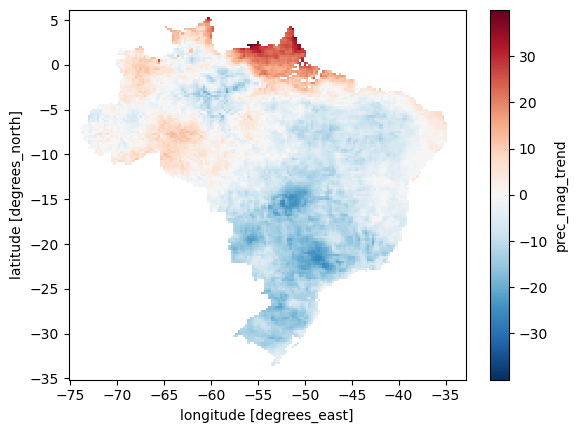

In [19]:
df_trend.prec_mag_trend.plot()

### Plotar a tendência de PRCPTOT para o período 1991-2021 em forma de mapa

Plotando sig para i = 0 e j = 0
Plotando sig para i = 0 e j = 1
Plotando sig para i = 0 e j = 2
Plotando sig para i = 0 e j = 3
Plotando sig para i = 0 e j = 4
Plotando sig para i = 0 e j = 5
Plotando sig para i = 0 e j = 6
Plotando sig para i = 0 e j = 7
Plotando sig para i = 0 e j = 8
Plotando sig para i = 0 e j = 9
Plotando sig para i = 0 e j = 10
Plotando sig para i = 0 e j = 11
Plotando sig para i = 0 e j = 12
Plotando sig para i = 0 e j = 13
Plotando sig para i = 0 e j = 14
Plotando sig para i = 0 e j = 15
Plotando sig para i = 0 e j = 16
Plotando sig para i = 0 e j = 17
Plotando sig para i = 0 e j = 18
Plotando sig para i = 0 e j = 19
Plotando sig para i = 0 e j = 20
Plotando sig para i = 0 e j = 21
Plotando sig para i = 0 e j = 22
Plotando sig para i = 0 e j = 23
Plotando sig para i = 0 e j = 24
Plotando sig para i = 0 e j = 25
Plotando sig para i = 0 e j = 26
Plotando sig para i = 0 e j = 27
Plotando sig para i = 0 e j = 28
Plotando sig para i = 0 e j = 29
Plotando sig para i 

Plotando sig para i = 24 e j = 101
Plotando sig para i = 24 e j = 102
Plotando sig para i = 24 e j = 103
Plotando sig para i = 24 e j = 104
Plotando sig para i = 24 e j = 105
Plotando sig para i = 24 e j = 106
Plotando sig para i = 24 e j = 107
Plotando sig para i = 24 e j = 108
Plotando sig para i = 24 e j = 109
Plotando sig para i = 24 e j = 110
Plotando sig para i = 24 e j = 111
Plotando sig para i = 24 e j = 112
Plotando sig para i = 24 e j = 113
Plotando sig para i = 24 e j = 114
Plotando sig para i = 24 e j = 115
Plotando sig para i = 24 e j = 116
Plotando sig para i = 24 e j = 117
Plotando sig para i = 24 e j = 118
Plotando sig para i = 24 e j = 119
Plotando sig para i = 24 e j = 120
Plotando sig para i = 24 e j = 121
Plotando sig para i = 24 e j = 122
Plotando sig para i = 24 e j = 123
Plotando sig para i = 24 e j = 124
Plotando sig para i = 24 e j = 125
Plotando sig para i = 24 e j = 126
Plotando sig para i = 24 e j = 127
Plotando sig para i = 24 e j = 128
Plotando sig para i 

Plotando sig para i = 57 e j = 113
Plotando sig para i = 57 e j = 114
Plotando sig para i = 57 e j = 115
Plotando sig para i = 57 e j = 116
Plotando sig para i = 57 e j = 117
Plotando sig para i = 57 e j = 118
Plotando sig para i = 57 e j = 119
Plotando sig para i = 57 e j = 120
Plotando sig para i = 57 e j = 121
Plotando sig para i = 57 e j = 122
Plotando sig para i = 57 e j = 123
Plotando sig para i = 57 e j = 124
Plotando sig para i = 57 e j = 125
Plotando sig para i = 57 e j = 126
Plotando sig para i = 57 e j = 127
Plotando sig para i = 57 e j = 128
Plotando sig para i = 57 e j = 129
Plotando sig para i = 57 e j = 130
Plotando sig para i = 57 e j = 131
Plotando sig para i = 57 e j = 132
Plotando sig para i = 57 e j = 133
Plotando sig para i = 57 e j = 134
Plotando sig para i = 57 e j = 135
Plotando sig para i = 57 e j = 136
Plotando sig para i = 57 e j = 137
Plotando sig para i = 57 e j = 138
Plotando sig para i = 57 e j = 139
Plotando sig para i = 57 e j = 140
Plotando sig para i 

Plotando sig para i = 81 e j = 74
Plotando sig para i = 81 e j = 75
Plotando sig para i = 81 e j = 76
Plotando sig para i = 81 e j = 77
Plotando sig para i = 81 e j = 78
Plotando sig para i = 81 e j = 79
Plotando sig para i = 81 e j = 80
Plotando sig para i = 81 e j = 81
Plotando sig para i = 81 e j = 82
Plotando sig para i = 81 e j = 83
Plotando sig para i = 81 e j = 84
Plotando sig para i = 81 e j = 85
Plotando sig para i = 81 e j = 86
Plotando sig para i = 81 e j = 87
Plotando sig para i = 81 e j = 88
Plotando sig para i = 81 e j = 89
Plotando sig para i = 81 e j = 90
Plotando sig para i = 81 e j = 91
Plotando sig para i = 81 e j = 92
Plotando sig para i = 81 e j = 93
Plotando sig para i = 81 e j = 94
Plotando sig para i = 81 e j = 95
Plotando sig para i = 81 e j = 96
Plotando sig para i = 81 e j = 97
Plotando sig para i = 81 e j = 98
Plotando sig para i = 81 e j = 99
Plotando sig para i = 81 e j = 100
Plotando sig para i = 81 e j = 101
Plotando sig para i = 81 e j = 102
Plotando si

Plotando sig para i = 90 e j = 101
Plotando sig para i = 90 e j = 102
Plotando sig para i = 90 e j = 103
Plotando sig para i = 90 e j = 104
Plotando sig para i = 90 e j = 105
Plotando sig para i = 90 e j = 106
Plotando sig para i = 90 e j = 107
Plotando sig para i = 90 e j = 108
Plotando sig para i = 90 e j = 109
Plotando sig para i = 90 e j = 110
Plotando sig para i = 90 e j = 111
Plotando sig para i = 90 e j = 112
Plotando sig para i = 90 e j = 113
Plotando sig para i = 90 e j = 114
Plotando sig para i = 90 e j = 115
Plotando sig para i = 90 e j = 116
Plotando sig para i = 90 e j = 117
Plotando sig para i = 90 e j = 118
Plotando sig para i = 90 e j = 119
Plotando sig para i = 90 e j = 120
Plotando sig para i = 90 e j = 121
Plotando sig para i = 90 e j = 122
Plotando sig para i = 90 e j = 123
Plotando sig para i = 90 e j = 124
Plotando sig para i = 90 e j = 125
Plotando sig para i = 90 e j = 126
Plotando sig para i = 90 e j = 127
Plotando sig para i = 90 e j = 128
Plotando sig para i 

Plotando sig para i = 103 e j = 78
Plotando sig para i = 103 e j = 79
Plotando sig para i = 103 e j = 80
Plotando sig para i = 103 e j = 81
Plotando sig para i = 103 e j = 82
Plotando sig para i = 103 e j = 83
Plotando sig para i = 103 e j = 84
Plotando sig para i = 103 e j = 85
Plotando sig para i = 103 e j = 86
Plotando sig para i = 103 e j = 87
Plotando sig para i = 103 e j = 88
Plotando sig para i = 103 e j = 89
Plotando sig para i = 103 e j = 90
Plotando sig para i = 103 e j = 91
Plotando sig para i = 103 e j = 92
Plotando sig para i = 103 e j = 93
Plotando sig para i = 103 e j = 94
Plotando sig para i = 103 e j = 95
Plotando sig para i = 103 e j = 96
Plotando sig para i = 103 e j = 97
Plotando sig para i = 103 e j = 98
Plotando sig para i = 103 e j = 99
Plotando sig para i = 103 e j = 100
Plotando sig para i = 103 e j = 101
Plotando sig para i = 103 e j = 102
Plotando sig para i = 103 e j = 103
Plotando sig para i = 103 e j = 104
Plotando sig para i = 103 e j = 105
Plotando sig p

Plotando sig para i = 112 e j = 91
Plotando sig para i = 112 e j = 92
Plotando sig para i = 112 e j = 93
Plotando sig para i = 112 e j = 94
Plotando sig para i = 112 e j = 95
Plotando sig para i = 112 e j = 96
Plotando sig para i = 112 e j = 97
Plotando sig para i = 112 e j = 98
Plotando sig para i = 112 e j = 99
Plotando sig para i = 112 e j = 100
Plotando sig para i = 112 e j = 101
Plotando sig para i = 112 e j = 102
Plotando sig para i = 112 e j = 103
Plotando sig para i = 112 e j = 104
Plotando sig para i = 112 e j = 105
Plotando sig para i = 112 e j = 106
Plotando sig para i = 112 e j = 107
Plotando sig para i = 112 e j = 108
Plotando sig para i = 112 e j = 109
Plotando sig para i = 112 e j = 110
Plotando sig para i = 112 e j = 111
Plotando sig para i = 112 e j = 112
Plotando sig para i = 112 e j = 113
Plotando sig para i = 112 e j = 114
Plotando sig para i = 112 e j = 115
Plotando sig para i = 112 e j = 116
Plotando sig para i = 112 e j = 117
Plotando sig para i = 112 e j = 118
P

Plotando sig para i = 139 e j = 91
Plotando sig para i = 139 e j = 92
Plotando sig para i = 139 e j = 93
Plotando sig para i = 139 e j = 94
Plotando sig para i = 139 e j = 95
Plotando sig para i = 139 e j = 96
Plotando sig para i = 139 e j = 97
Plotando sig para i = 139 e j = 98
Plotando sig para i = 139 e j = 99
Plotando sig para i = 139 e j = 100
Plotando sig para i = 139 e j = 101
Plotando sig para i = 139 e j = 102
Plotando sig para i = 139 e j = 103
Plotando sig para i = 139 e j = 104
Plotando sig para i = 139 e j = 105
Plotando sig para i = 139 e j = 106
Plotando sig para i = 139 e j = 107
Plotando sig para i = 139 e j = 108
Plotando sig para i = 139 e j = 109
Plotando sig para i = 139 e j = 110
Plotando sig para i = 139 e j = 111
Plotando sig para i = 139 e j = 112
Plotando sig para i = 139 e j = 113
Plotando sig para i = 139 e j = 114
Plotando sig para i = 139 e j = 115
Plotando sig para i = 139 e j = 116
Plotando sig para i = 139 e j = 117
Plotando sig para i = 139 e j = 118
P

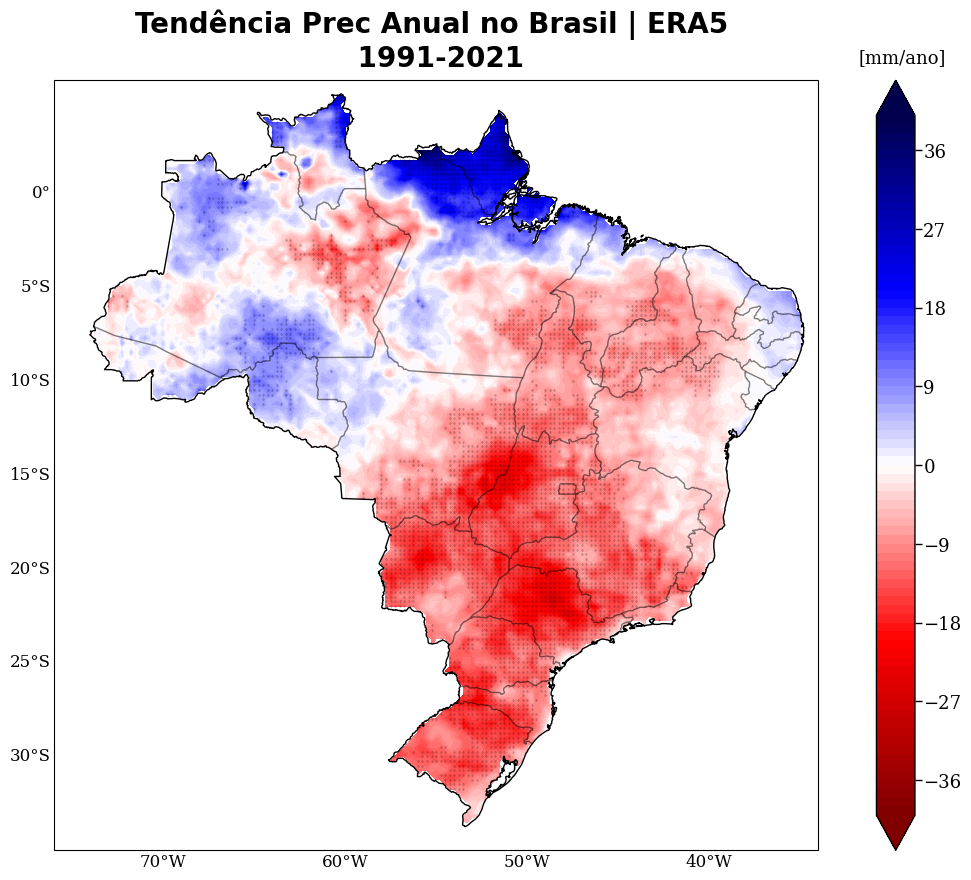

In [20]:
fig, ax = plt.subplots(figsize = (15, 10), subplot_kw = dict(projection = ccrs.PlateCarree()))

plot_mag = plt.contourf(mag_trend_da.lon, mag_trend_da.lat, mag_trend_da, transform = ccrs.PlateCarree(),
                            cmap = 'seismic_r', levels = np.arange(-40, 41, 1), extend = 'both')

# plt.contour(sig_trend_da.lon, sig_trend_da.lat, sig_trend_da, transform = ccrs.PlateCarree(),
#                             cmap = 'seismic_r', levels = np.arange(-40, 41, 1), extend = 'both')

font_gl = {'size': 12,'color': 'black'}

plt.rcParams['font.family'] = 'serif'

states = NaturalEarthFeature(category = 'cultural', scale = '50m', facecolor = 'none', name ='admin_1_states_provinces_lines')

ax.add_feature(states, edgecolor = 'black', linewidth = 1, alpha = 0.5, linestyle = '-')
    
ax.set_xlim(left = -76, right = -34)
ax.set_ylim(bottom = -35, top = 6)

gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, alpha = 0)
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xpadding = 2
gl.ypadding = 2
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(-70, -30, 10))
gl.ylocator = mticker.FixedLocator(np.arange(-30, 5, 5))
gl.xlabel_style = font_gl
gl.ylabel_style = font_gl

BR_shp.plot(ax = ax, lw = 1, ec = 'black', fc = 'none')

ax.set_title('Tendência Prec Anual no Brasil | ERA5 \n 1991-2021', 
                fontsize = 20, fontweight = 'bold', pad = 10)

cbar = plt.colorbar()
cbar.outline.set_linewidth(1)
cbar.ax.tick_params(labelsize = 13, width = 1, length = 5, pad = 1)


ax.text(1.11, 1.03, '[mm/ano]',
          verticalalignment = 'center', horizontalalignment = 'center',
          transform = ax.transAxes,
          color = 'black', fontsize = 13, family = 'serif',
          fontweight = 'normal')


for i in range(len(mag_trend_da.lat)): #looping dos pontos em latitude
        
    for j in range(len(mag_trend_da.lon)): #looping dos pontos em longitude

        print (f'Plotando sig para i = {i} e j = {j}')
            
        if sig_trend[i, j] == 1: #se for significativo, plota o símbolo
                
            ax.plot(sig_trend_da.lon[j], sig_trend_da.lat[i], color = 'black', marker = '+',
                    linestyle = 'dashed', linewidth = 0.5, markersize = 2, alpha = 0.2)

                
plt.savefig(f'{path_out}Trend_PRCPTOT_1991-2021_ERA5.jpeg', dpi = 600, bbox_inches = 'tight')